---
## Task 1:
A- Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

B- Provide a short paragraph to describe your understanding of the dataset. (around 100 words)

### Task 1 - Part A: Load and Explore the Dataset
In this task, we’ll use the Pandas library to load the sample-superstore.csv dataset and define two reusable methods:
- head(limit) – Returns the top N rows of the dataset.
- tail(limit) – Returns the bottom N rows of the dataset.

These methods take a parameter limit that specifies how many rows to return.

---

In [15]:
import pandas as pd
from pandas import DataFrame

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        self.store_data_frame = pd.read_csv(path, sep=',')

    def head(self, limit: int):
        return self.store_data_frame.head(limit)

    def tail(self, limit: int):
        return self.store_data_frame.tail(limit)

if __name__ == '__main__':
    exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
    ## printing first 10 records associated with column names
    print(exp_data_analysis.head(10).to_markdown())

|    |   Row ID | Order ID       | Order Date   | Ship Date   | Ship Mode      | Customer ID   | Customer Name    | Segment     | Country       | City         | State          | Postal Code   | Region   | Product ID      | Category        | Sub-Category   | Product Name                                                                |    Sales | Quantity   |   Discount | Profit       |
|---:|---------:|:---------------|:-------------|:------------|:---------------|:--------------|:-----------------|:------------|:--------------|:-------------|:---------------|:--------------|:---------|:----------------|:----------------|:---------------|:----------------------------------------------------------------------------|---------:|:-----------|-----------:|:-------------|
|  0 |     7773 | CA-2016-108196 | 25/11/2016   | 12/02/2016  | Standard Class | CS-12505      | Cindy Stewart    | Consumer    | United States | Lancaster    | Ohio           | 43130         | Est      | TEC-MA-10000418 | T

---

### Task 1 Part B - Understanding the Sample Superstore Dataset

The Sample Superstore dataset captures detailed retail sales data from a fictional store. It includes information about customer orders such as 
- `Order ID`
- `Order Date`
- `Ship Mode`
- `Customer Name`
- `Segment`
- `City`
- `State`
- `Region`

Each transaction is linked to a product with,
- `Product ID`
- `Category`
- `Sub-Category`
- `Product Name`

Each transaction contains metrics such as 
- `sales`
- `Quantity`
- `Discount`
- `Profit`

This dataset is ideal for analysing customer purchasing behaviour, shipping performance, product profitability, and regional sales trends. It can be used in data science for performing exploratory data analysis (EDA), creating dashboards, and building predictive business models.

### Loading Data
To work with this data in Python, we use the Pandas library, which provides powerful tools for data manipulation and analysis. We load the dataset using `pd.read_csv()`, which reads the CSV file and returns a `DataFrame`. A DataFrame is a two-dimensional labelled data structure in Pandas, similar to a table in a database or an Excel spreadsheet. It allows us to easily inspect, filter, sort, and transform the data. Once loaded, the dataset becomes a DataFrame object where each row represents a single order and each column represents a different attribute related to the order.

---

## Task 2:
Process the dataset's variables and conduct exploratory data analysis. Explore the dataset thoroughly, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

- Descriptive statistics: Describe features of the data set by generating summaries about data samples.
- Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.
- Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.
- Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.
- Handling missing values in the dataset: Identify methods for cleaning the dataset.
- Correlation: Describe features that are related and the nature of that relationship.
- Univariate analysis and visualisation: Use different visualisation methods for demonstrating your analysis scenarios.

---

## Inspecting the Dataset

**Before performing any analysis, it's crucial to understand the dataset structure, its size, column names, and a preview of its contents. This helps us identify initial issues or patterns.**

Shape of Dataset: 
 (9994, 20)

Column Names: 
 ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


---

## Data Types and Non-Null Counts

**Understanding the data types and the presence of null values helps identify necessary preprocessing steps such as data type conversions or handling missing data.** **This ensures data integrity and effective downstream analysis (Brown, 2020).**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9992 non-null   object 
 2   Ship Date      9991 non-null   object 
 3   Ship Mode      9990 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9991 non-null   object 
 6   Segment        9991 non-null   object 
 7   Country        9990 non-null   object 
 8   City           9992 non-null   object 
 9   State          9990 non-null   object 
 10  Postal Code    9991 non-null   object 
 11  Region         9991 non-null   object 
 12  Product ID     9992 non-null   object 
 13  Category       9992 non-null   object 
 14  Sub-Category   9990 non-null   object 
 15  Product Name   9991 non-null   object 
 16  Sales          9993 non-null   float64
 17  Quantity       9989 non-null   object 
 18  Discount

---

## Analysing Missing Values

**Missing values can distort analysis and models. Here, we quantify and locate missing data to decide on appropriate imputation or removal strategies.**


Missing values in each column: 
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64


---

## Categorical Columns

**Categorical variables typically have a limited number of unique values.** **By selecting columns with 5 or fewer unique values, we identify potential categorical features** **that may benefit from special treatment like encoding or imputation (Han et al., 2011).**


Columns with ≤ 5 unique values (possible categorical features):

['Ship Mode', 'Segment', 'Country', 'Category']


---

## Fill Missing:


Filling up missing values in categorical columns with value 'UNKNOWN'.




**Print values after filling missing:**

Column Ship Mode have values ['Standard Class' 'Same Day' 'First Class' 'Second Class' 'UNKNOWN'].
Column Segment have values ['Consumer' 'Corporate' 'Home Office' '%' 'UNKNOWN'].
Column Country have values ['United States' 'UNKNOWN' 'US' '56'].
Column Category have values ['Technology' 'Office Supplies' 'Frnture' 'Furniture' 'UNKNOWN'].


---

## Data Cleansing:

Replaced 1 occurrence(s) of '%' with 'UNKNOWN' in column 'Segment'.
Total now: 4 instance(s) of 'UNKNOWN' in 'Segment'.

Replaced 1 occurrence(s) of '56' with 'UNKNOWN' in column 'Country'.
Total now: 5 instance(s) of 'UNKNOWN' in 'Country'.

Replaced 1 occurrence(s) of 'Two' with '2' in column 'Quantity'.
Total now: 1 instance(s) of '2' in 'Quantity'.

Replaced 1 occurrence(s) of 'Thirteen' with '13' in column 'Quantity'.
Total now: 1 instance(s) of '13' in 'Quantity'.

Replaced 1 occurrence(s) of 'Seven' with '7' in column 'Quantity'.
Total now: 1 instance(s) of '7' in 'Quantity'.

Replaced 1 occurrence(s) of 'ten' with '10' in column 'Quantity'.
Total now: 1 instance(s) of '10' in 'Quantity'.

Replaced 1 occurrence(s) of '7?' with '7' in column 'Quantity'.
Total now: 2 instance(s) of '7' in 'Quantity'.



**Print values after cleansing:**

Column Ship Mode have values ['Standard Class' 'Same Day' 'First Class' 'Second Class' 'UNKNOWN'].
Column Segment have values ['Consumer' 'Corporate' 'Home Office' 'UNKNOWN'].
Column Country have values ['United States' 'UNKNOWN' 'US'].
Column Category have values ['Technology' 'Office Supplies' 'Frnture' 'Furniture' 'UNKNOWN'].


---

## Converting types:



Column Ship Mode type is converted to category
Column Segment type is converted to category
Column Country type is converted to category
Column Category type is converted to category


Column Profit type is converted to float
Column Quantity type is converted to float


---

## Descriptive Statistics:

              Sales     Quantity     Discount       Profit
count   9993.000000  9989.000000  9991.000000  9983.000000
mean     229.863780     3.789368     0.156180    29.080659
std      623.276019     2.225495     0.206399   233.222001
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.744300
50%       54.480000     3.000000     0.200000     8.674400
75%      209.940000     5.000000     0.200000    29.368000
max    22638.480000    14.000000     0.800000  8399.976000


---

## Visualising Outliers:

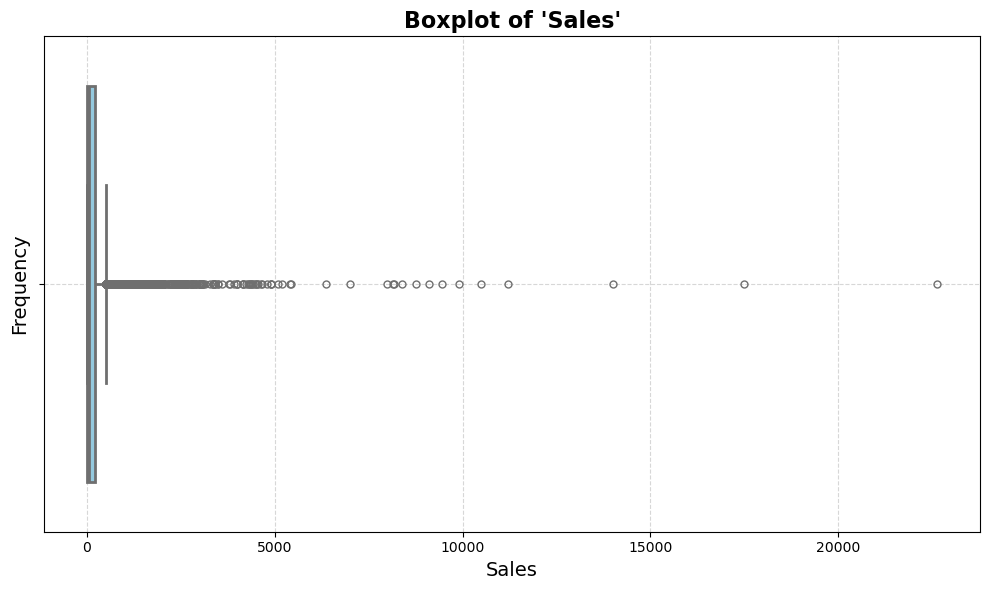

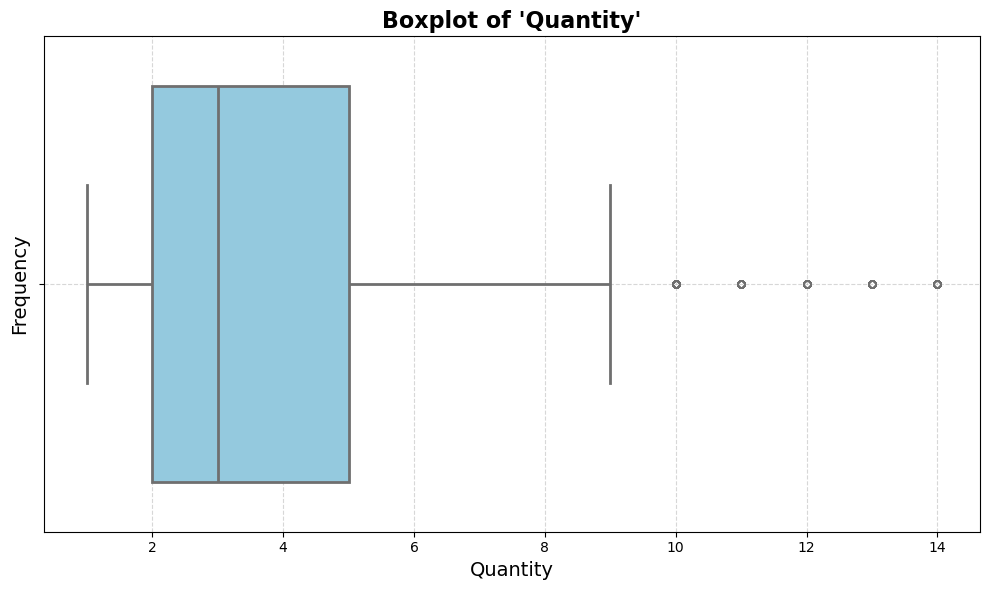

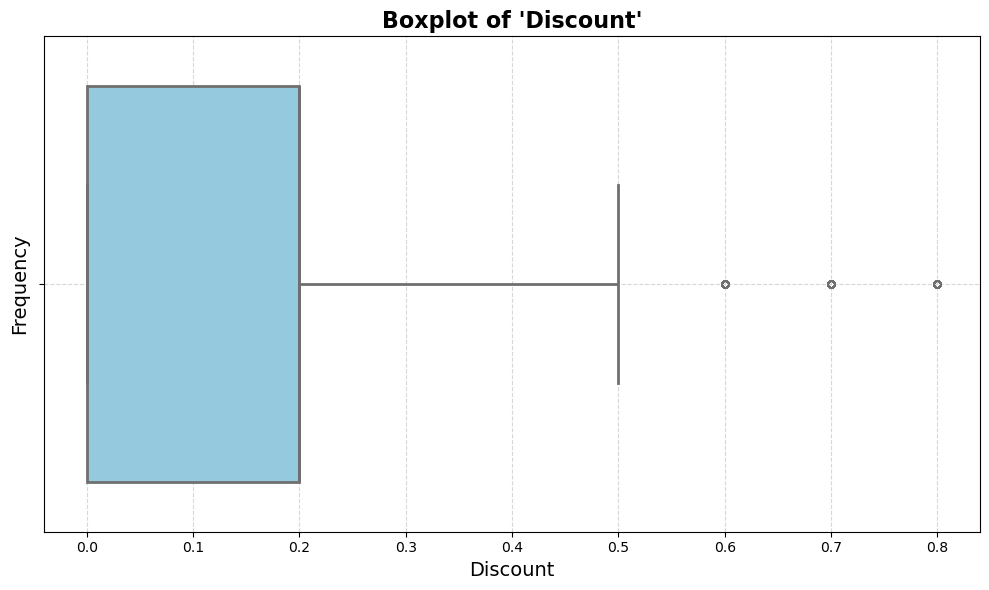

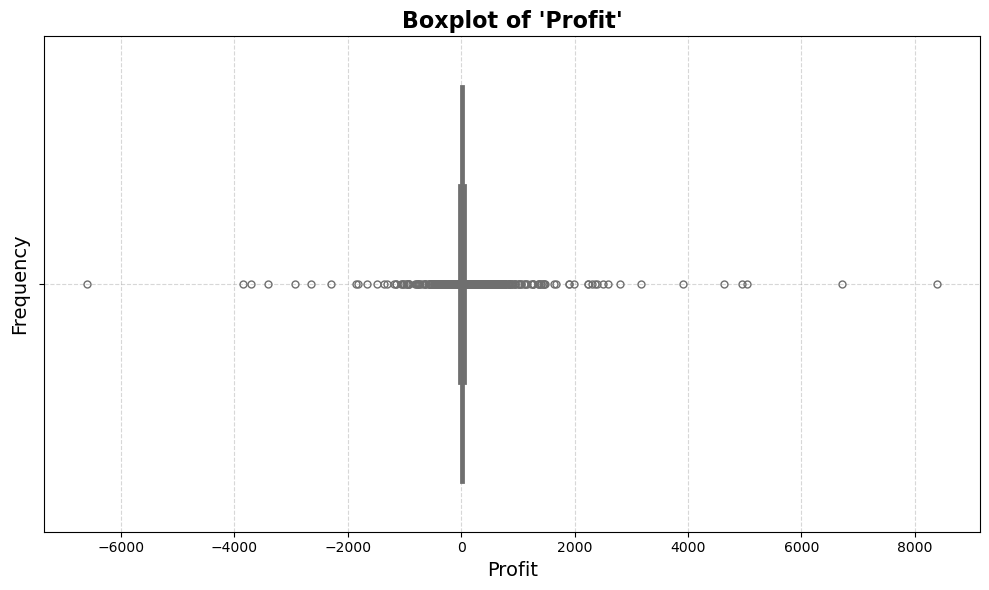

---

## Treat Outliers Using REMOVE method:


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


## Visualising Outliers:

**Visualising outliers after treatment using REMOVE method**

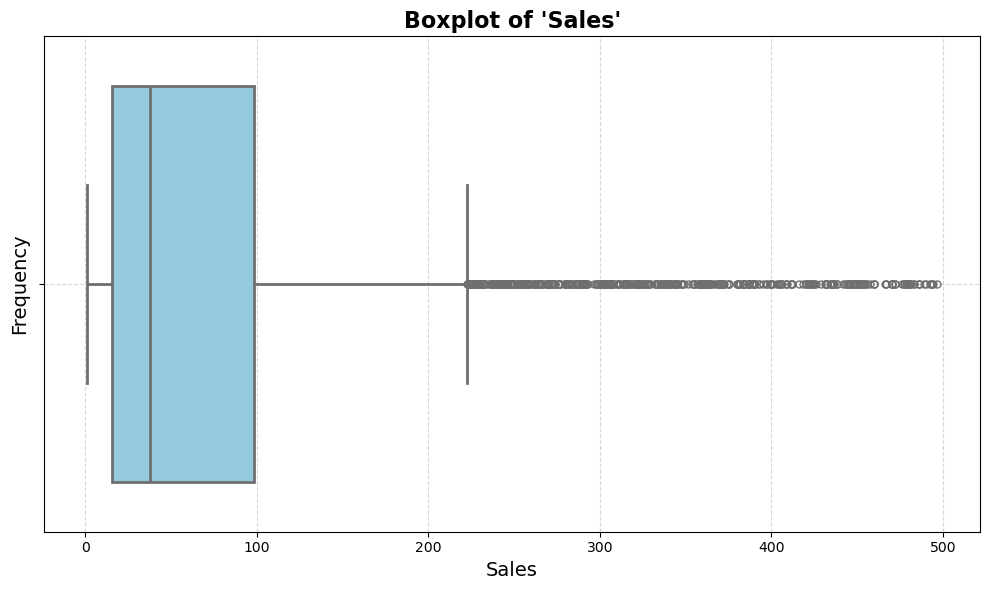

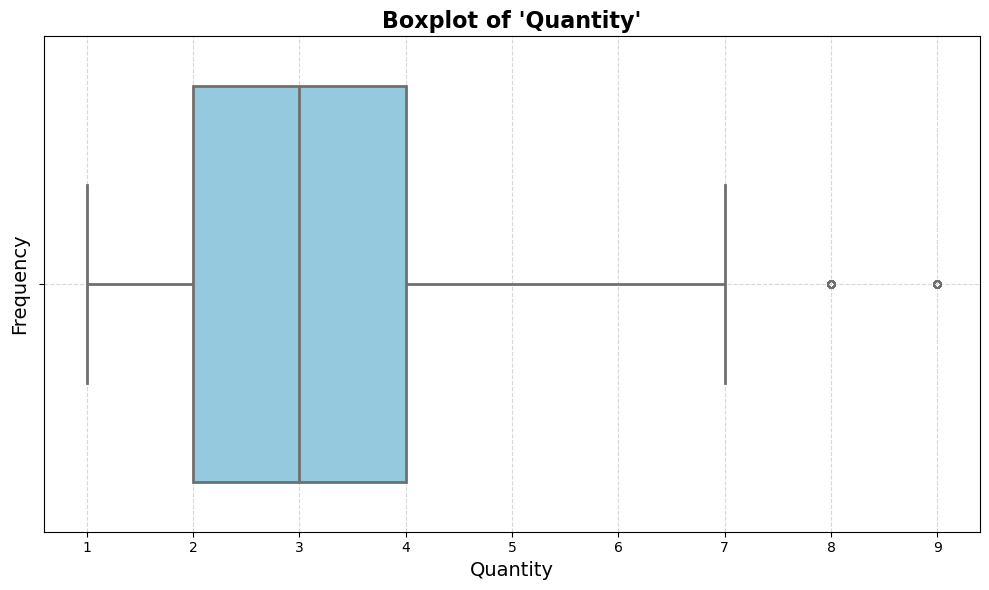

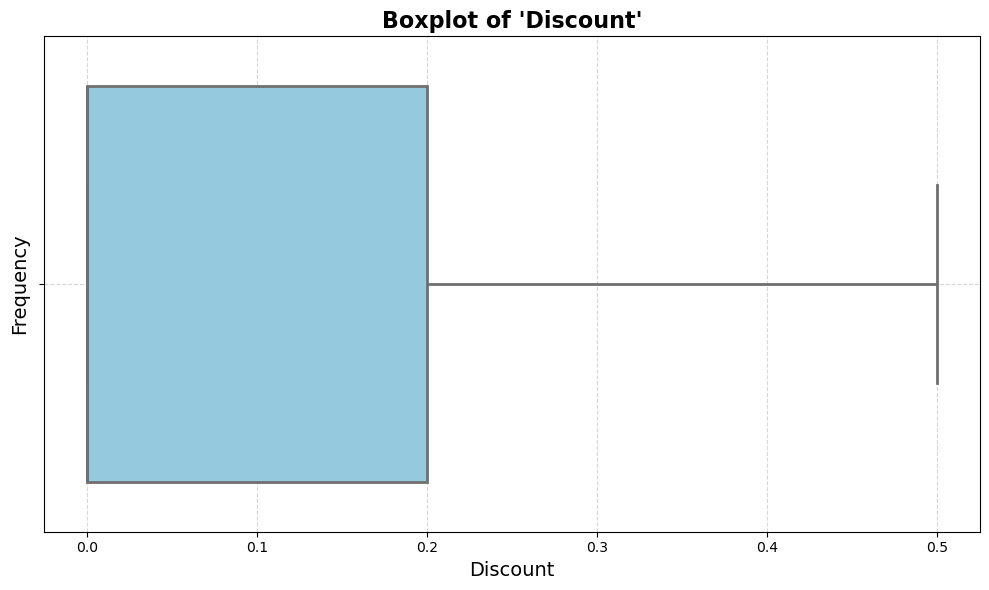

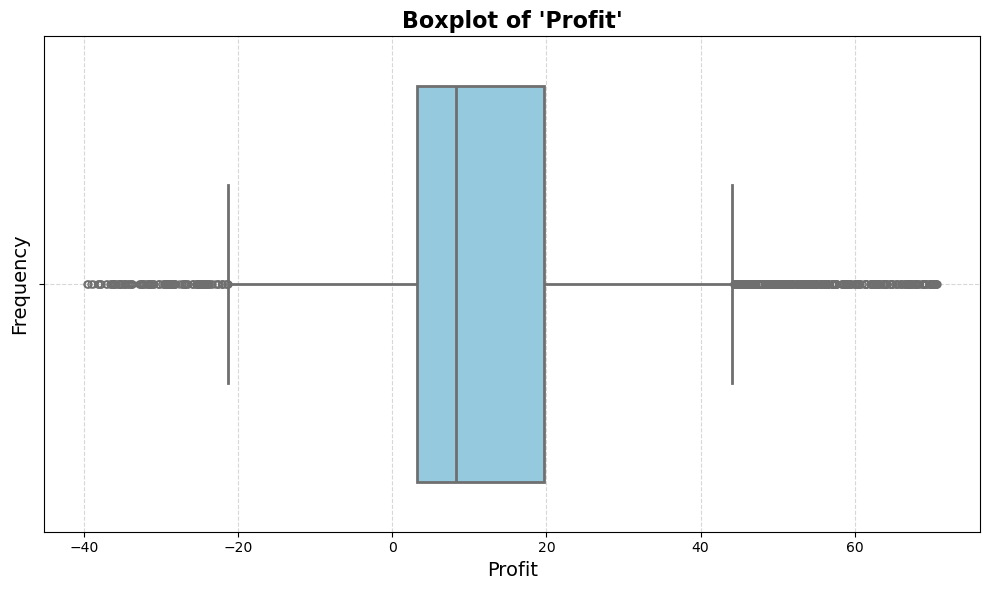

---

## Treat Outliers Using CAP method:


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


## Visualising Outliers:

**Visualising outliers after treatment using CAP method**

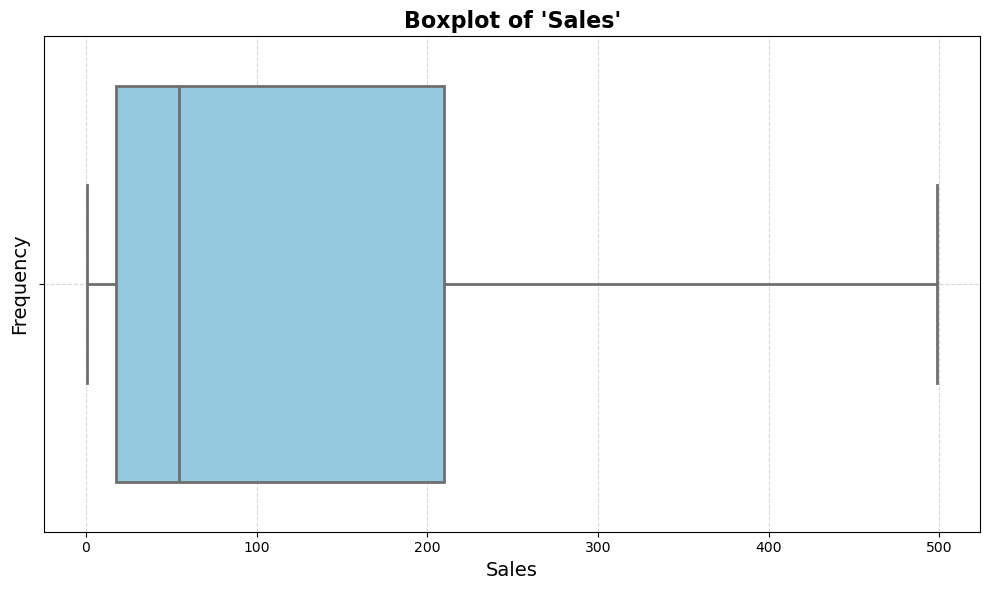

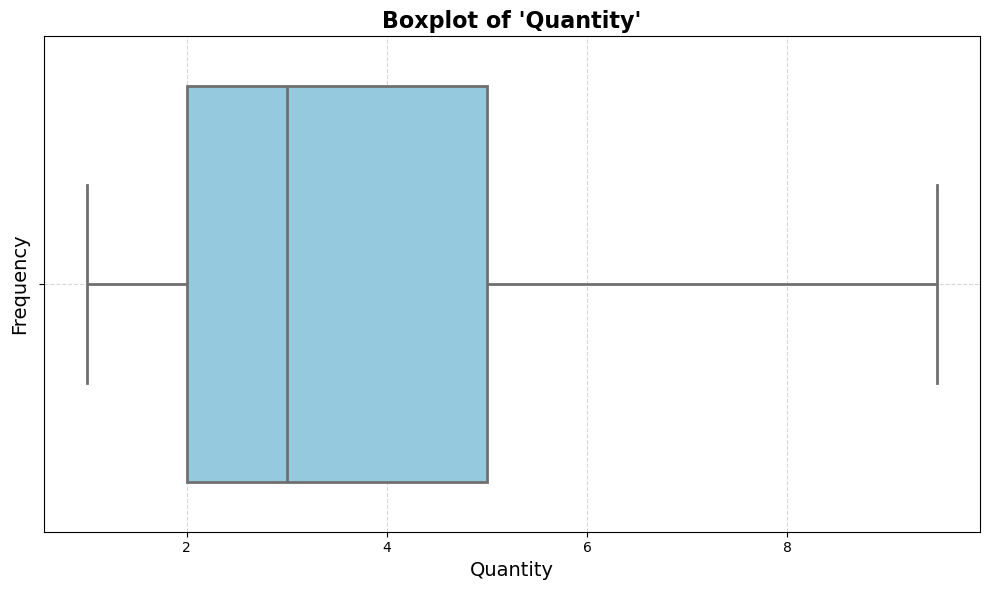

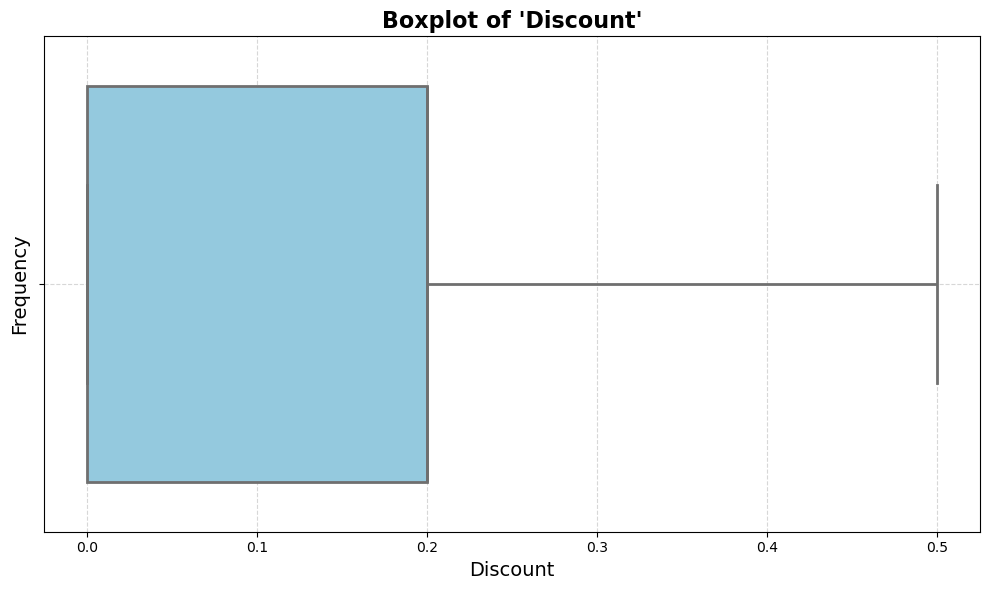

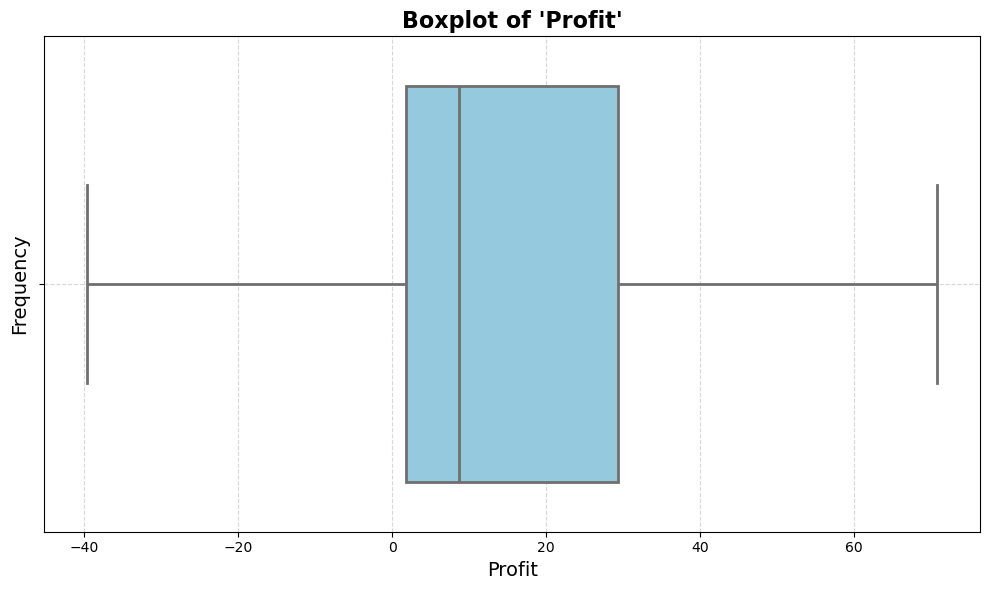

---

## Treat Outliers Using TRANSFORM_YEO_JOHNSON method:


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


## Visualising Outliers:

**Visualising outliers after treatment using TRANSFORM_YEO_JOHNSON method**

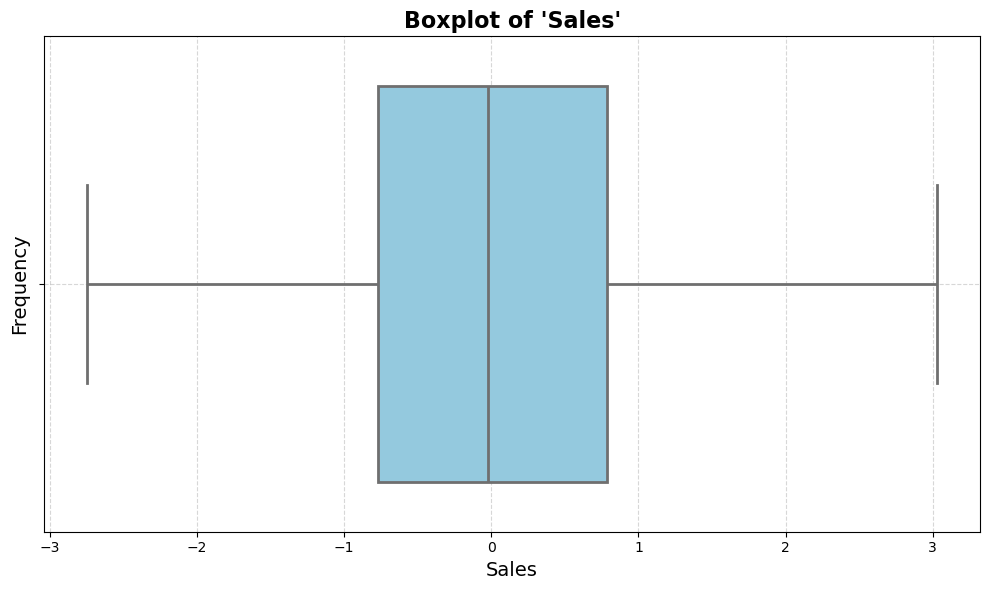

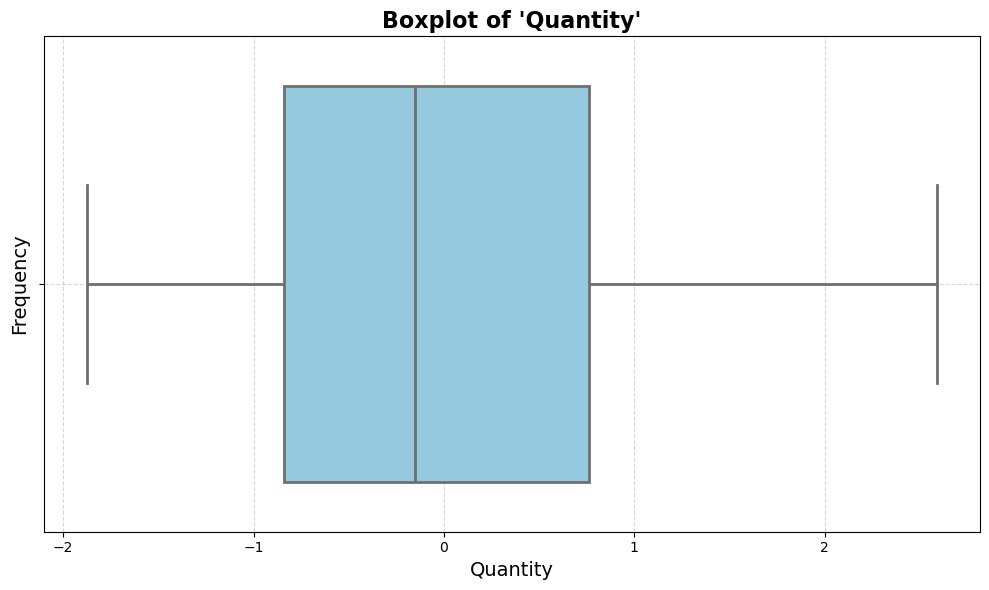

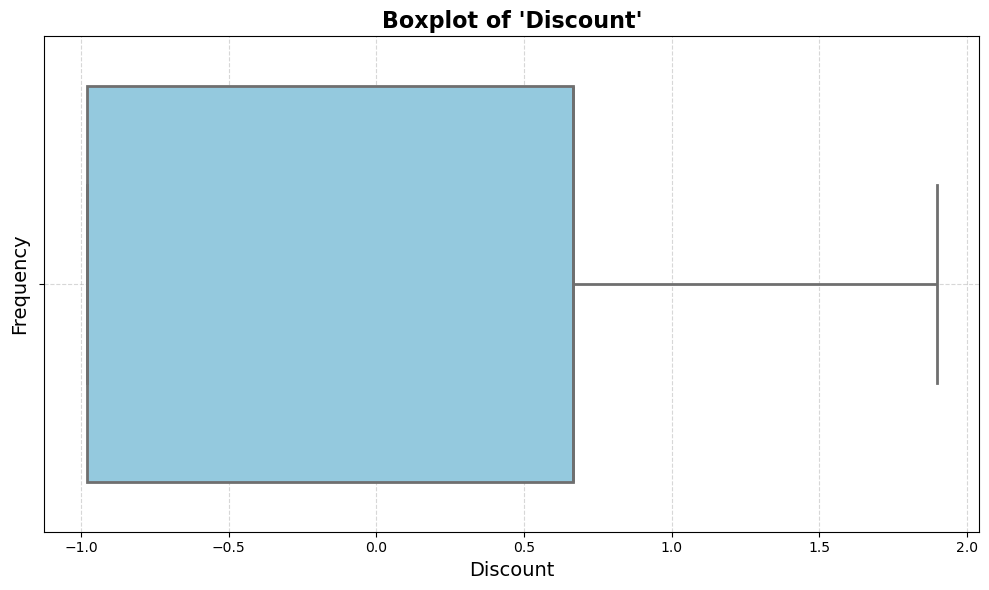

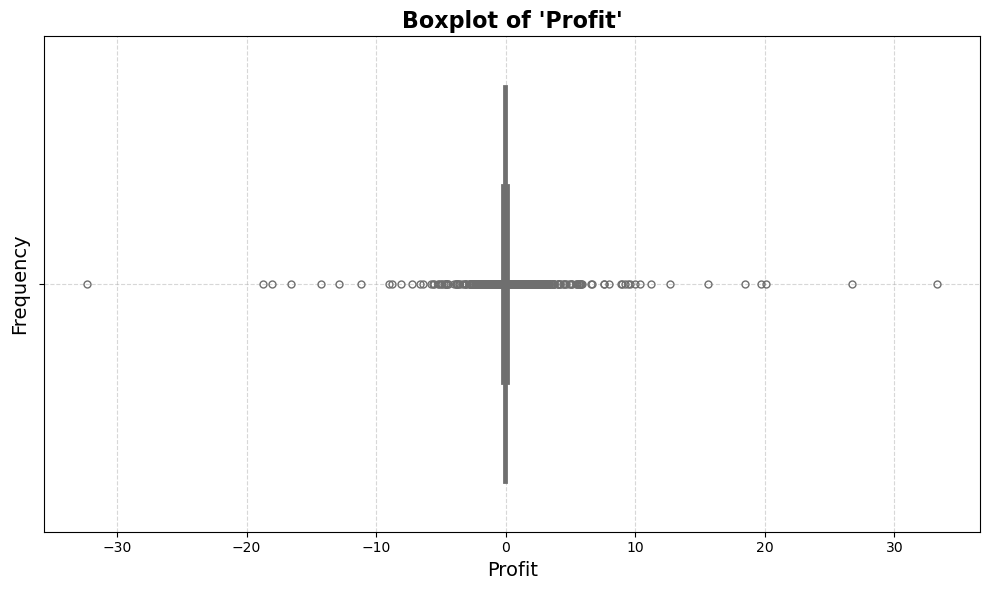

---

## Treat Outliers Using TRANSFORM_BOX_COX method:


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.


**Negative values not allowed : Box-Cox transform requires strictly positive values in 'Discount'.**

---

## Treat Outliers Using IMPUTE method:


Sales: Detected bounds [-271.71000000000004, 498.93] using IQR.

Quantity: Detected bounds [-2.5, 9.5] using IQR.

Discount: Detected bounds [-0.30000000000000004, 0.5] using IQR.

Profit: Detected bounds [-39.691250000000004, 70.80355] using IQR.


## Visualising Outliers:

**Visualising outliers after treatment using IMPUTE method**

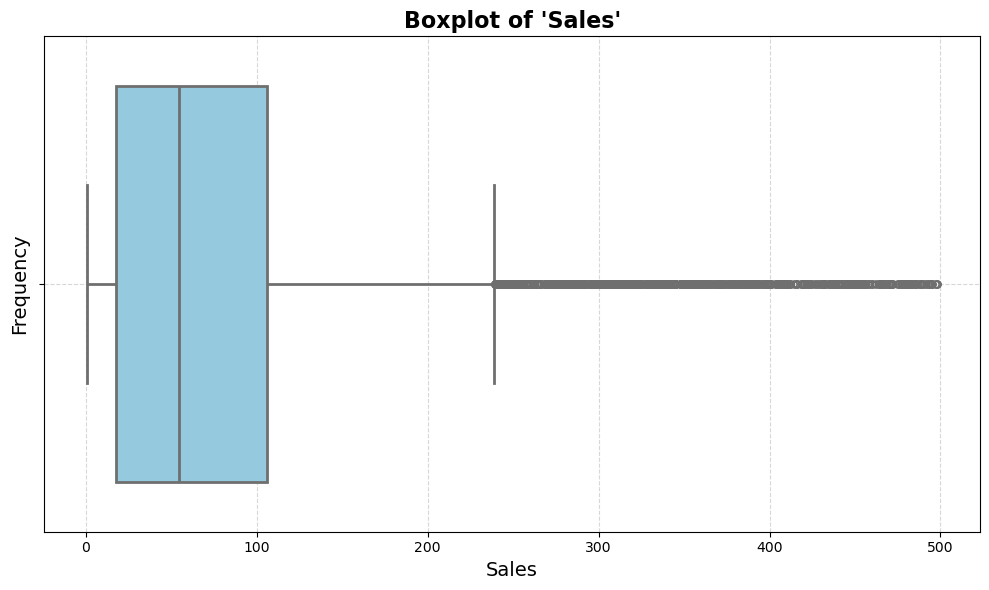

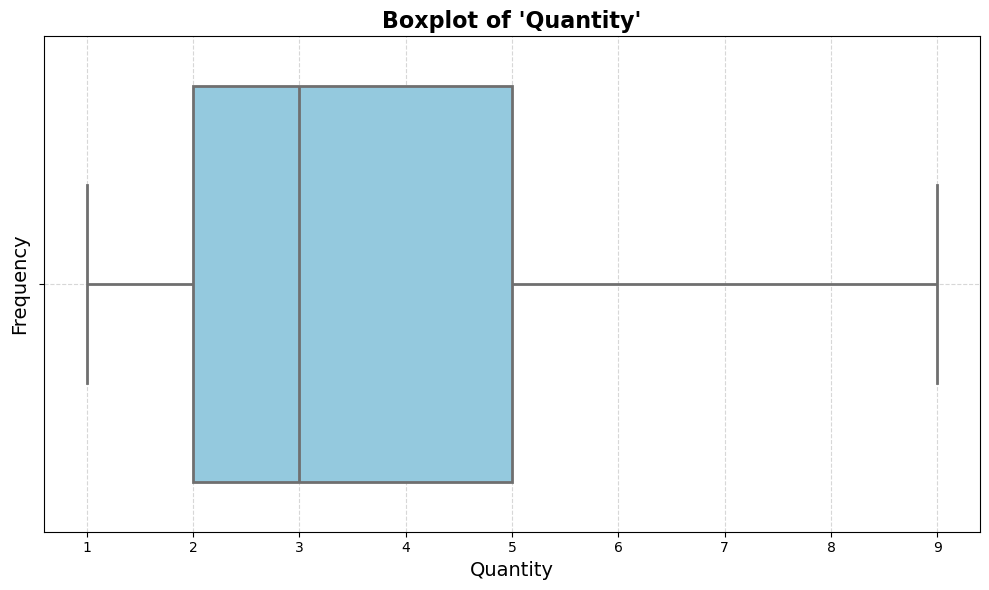

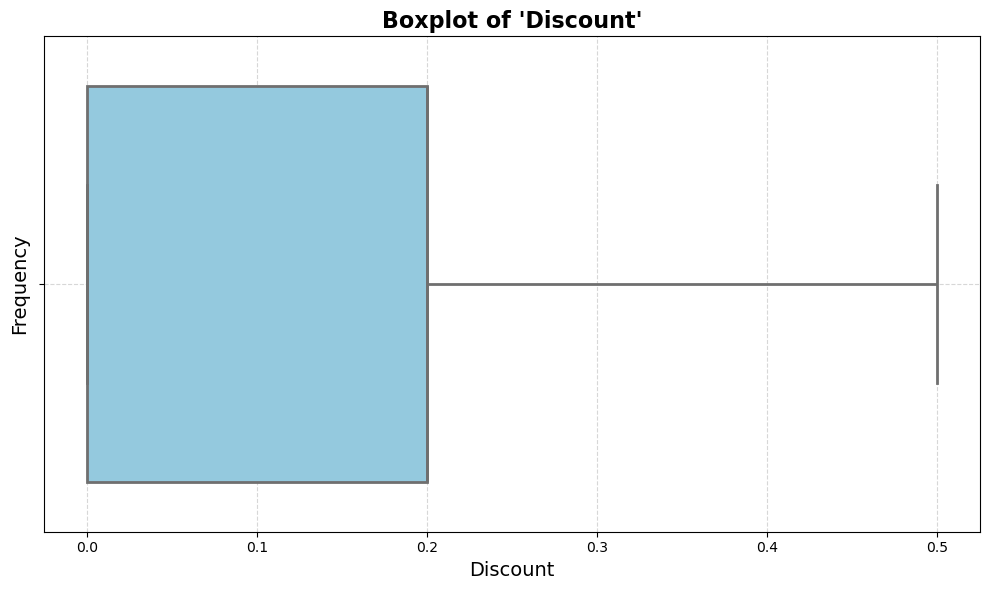

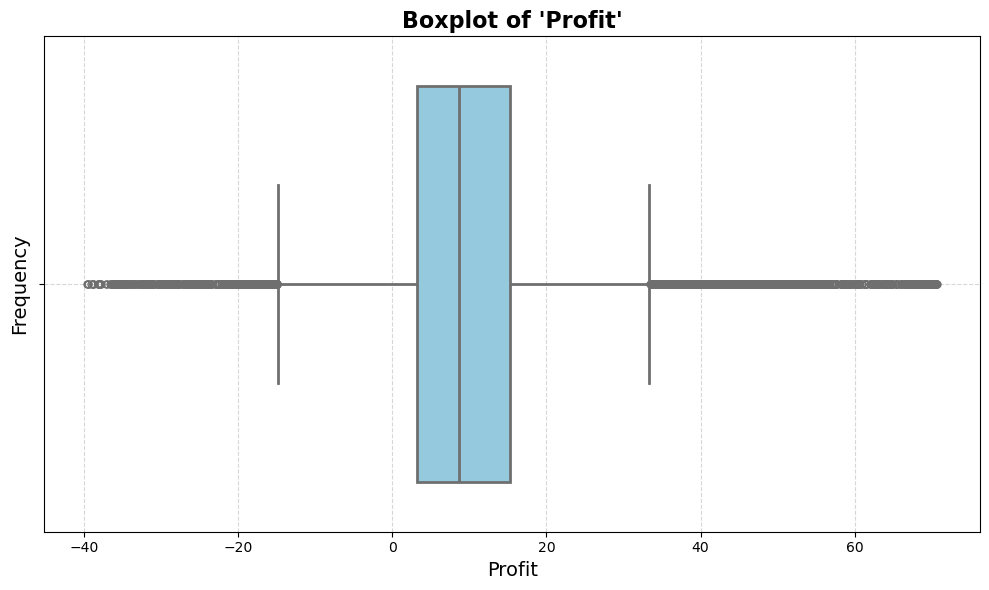

---

## Update Exploratory Data

**Observation:** Visualising the treatment using the **CAP** method shows promising results. We will proceed with the **CAP** method for further analysis.

---

## Normalising and scaling:

Successfully scaled 'Sales' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Quantity' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Discount' using 'NumericScaleMethods.STANDARD' method.
Successfully scaled 'Profit' using 'NumericScaleMethods.STANDARD' method.


**Descriptive stats after normalising and scaling:**

              Sales      Quantity      Discount        Profit
count  9.993000e+03  9.989000e+03  9.991000e+03  9.983000e+03
mean  -9.101318e-17  9.104962e-17  4.551570e-17  1.366565e-16
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00
min   -8.283807e-01 -1.309273e+00 -8.718642e-01 -1.895833e+00
25%   -7.286437e-01 -8.337145e-01 -8.718642e-01 -4.884767e-01
50%   -5.082696e-01 -3.581564e-01  3.968306e-01 -2.530962e-01
75%    4.126804e-01  5.929599e-01  3.968306e-01  4.497609e-01
max    2.124667e+00  2.732972e+00  2.299873e+00  1.857117e+00


**Visualising after normalising and scaling:**

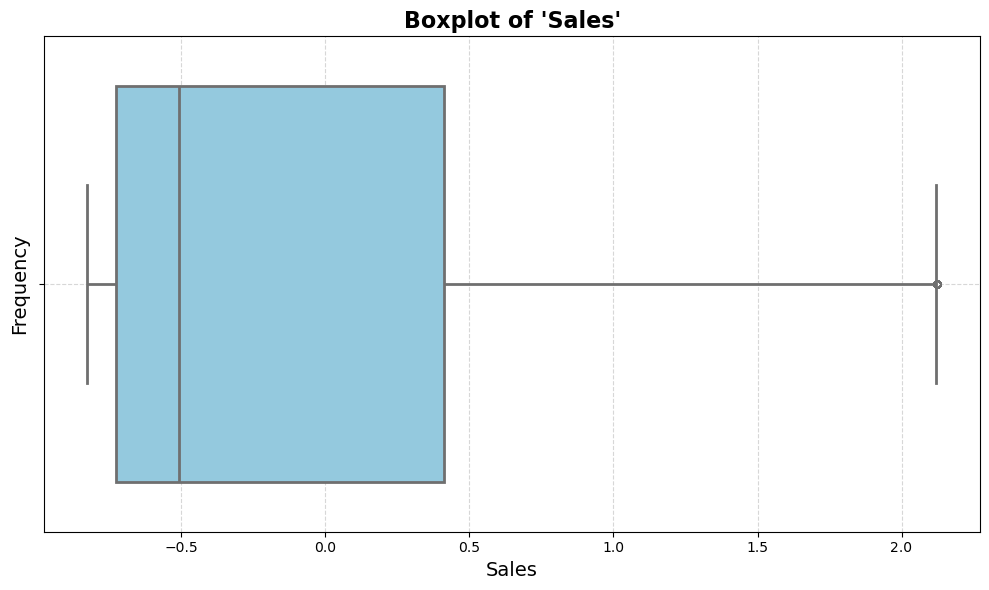

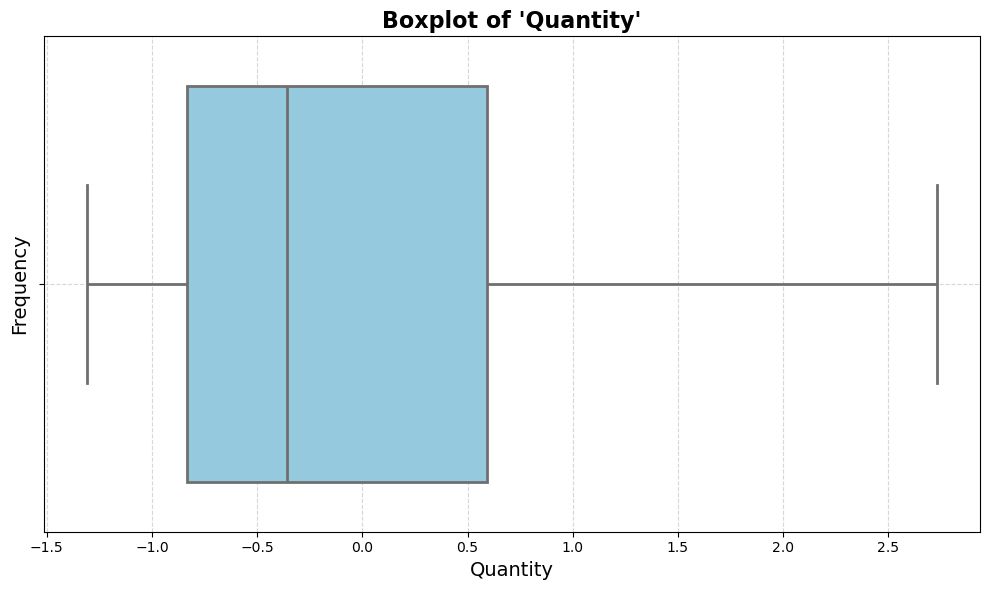

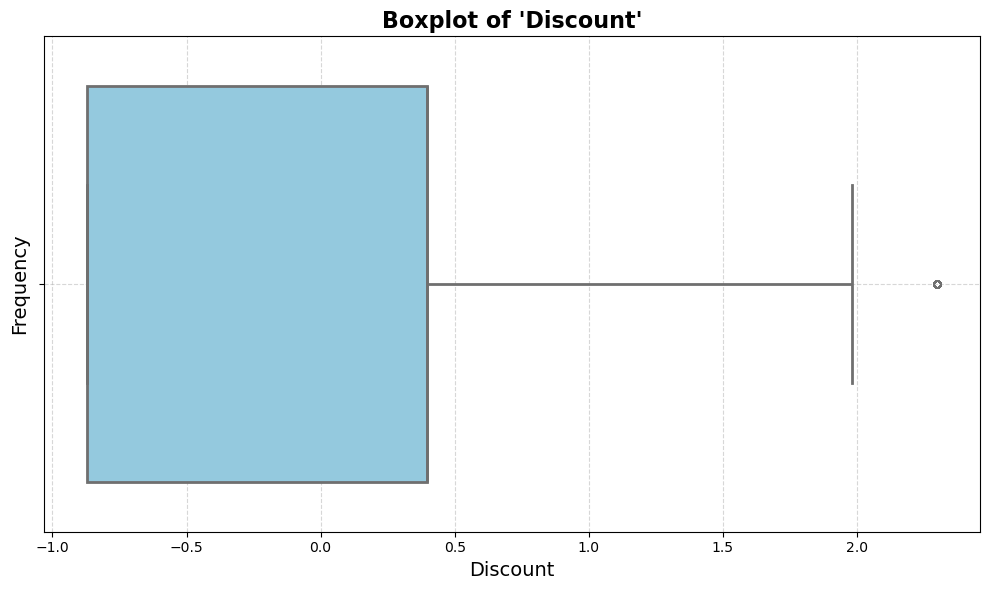

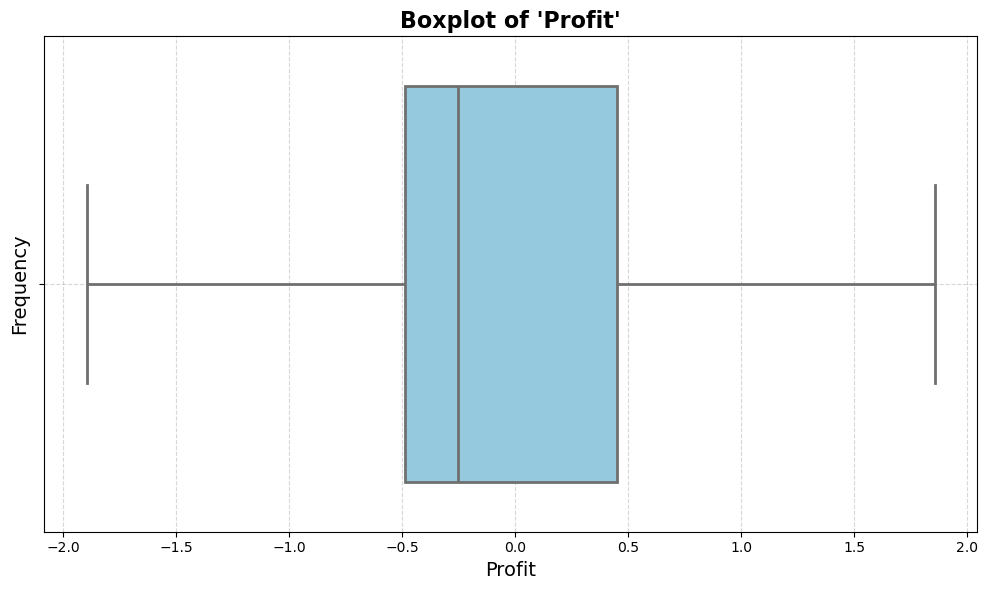

---

## Data Aggregations:

<Figure size 1000x600 with 0 Axes>

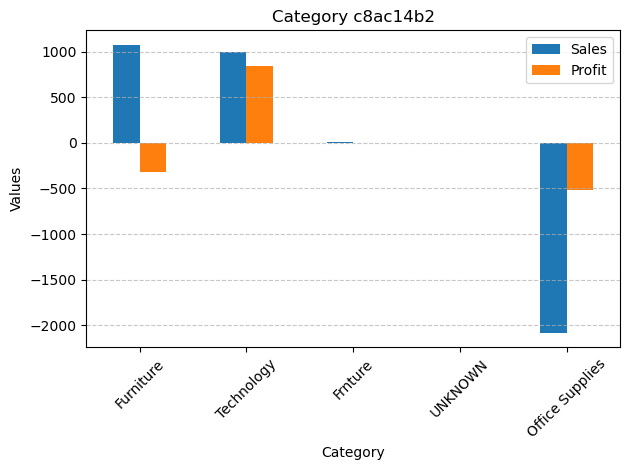

<Figure size 1000x600 with 0 Axes>

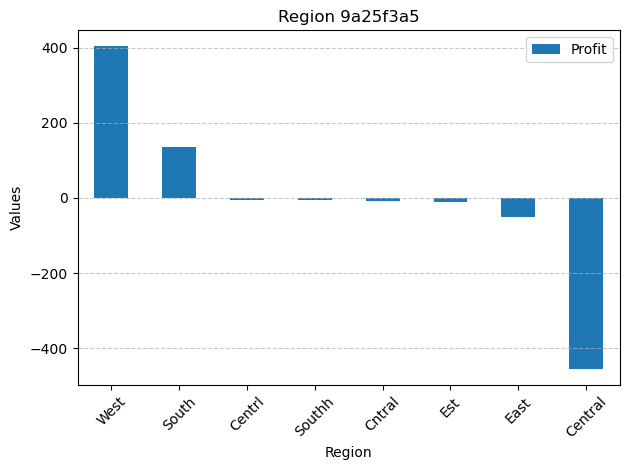

<Figure size 1000x600 with 0 Axes>

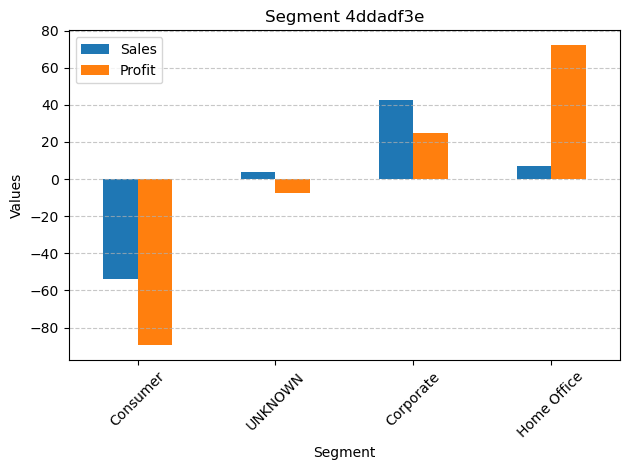

---

## Frequency Distributions:

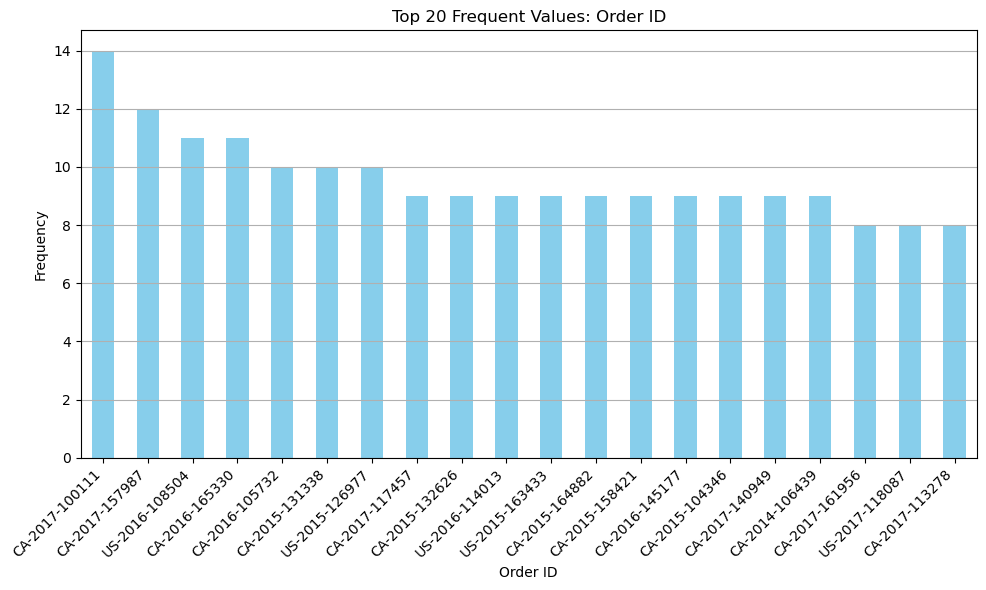

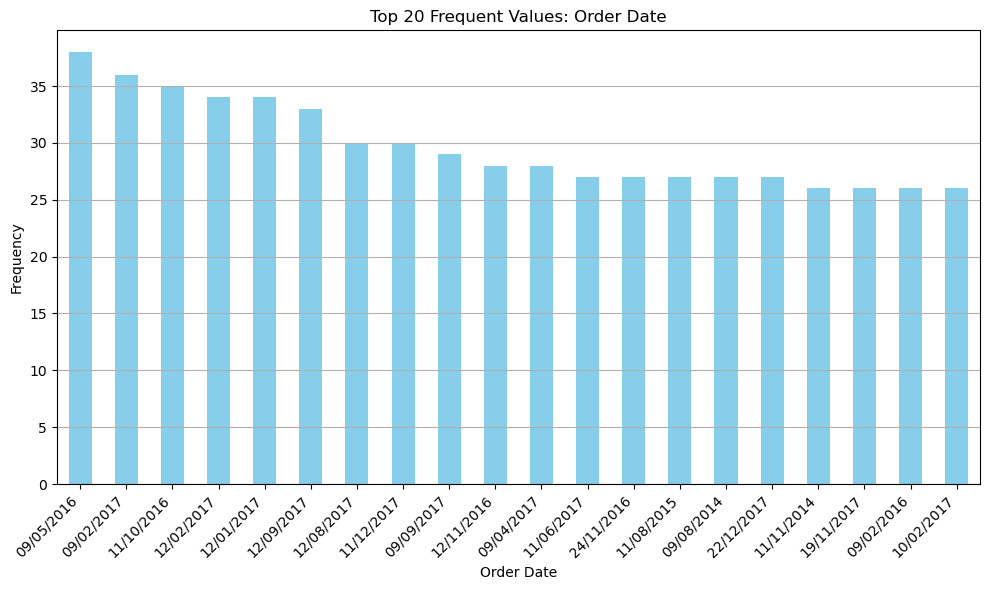

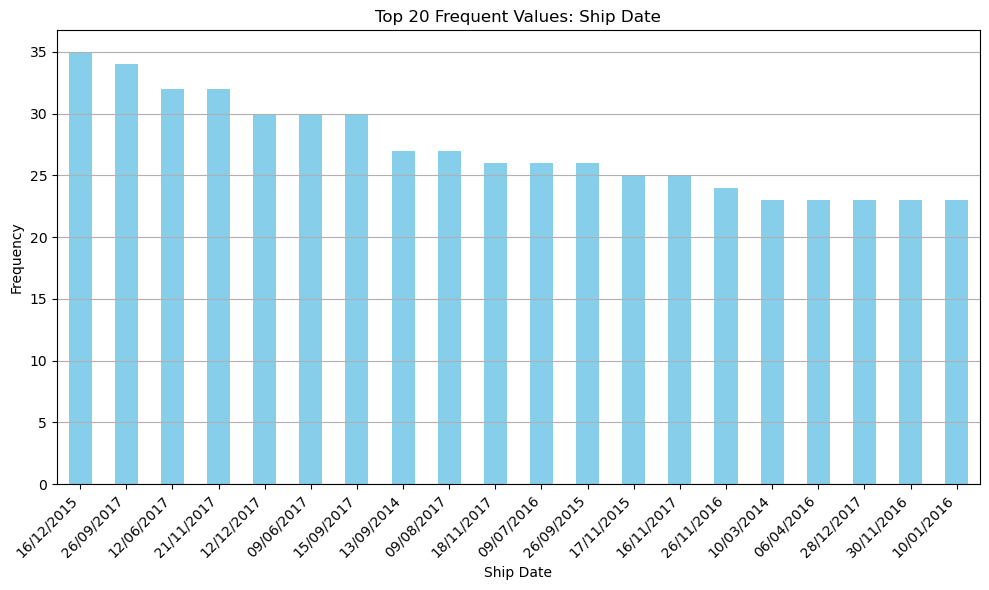

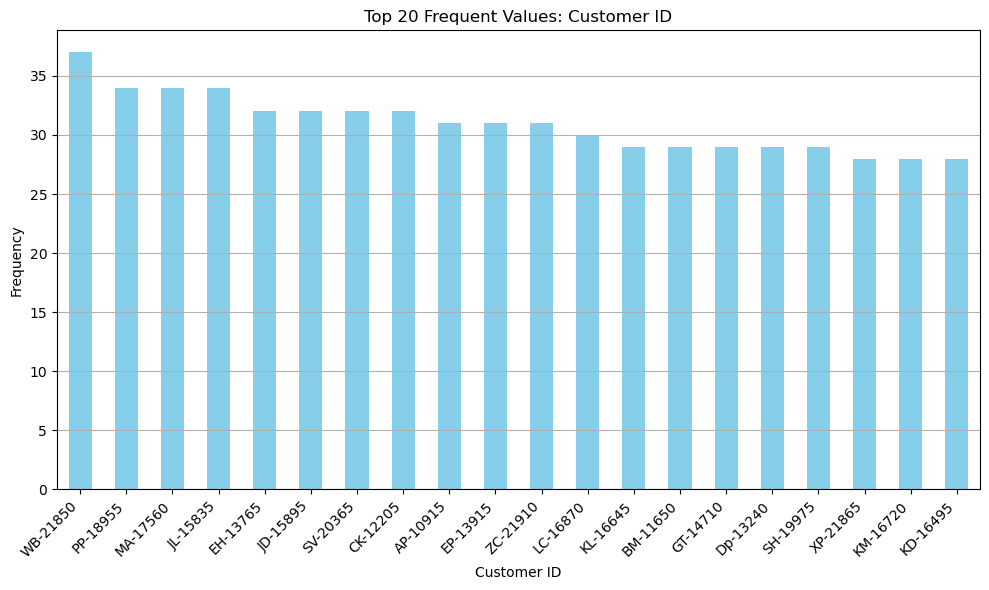

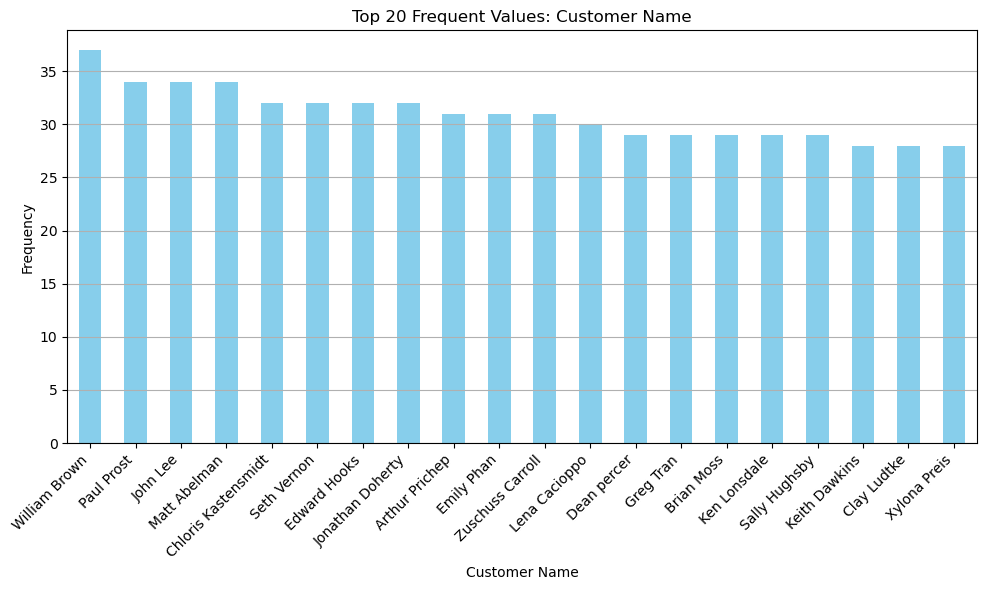

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum
import hashlib
from IPython.display import display, Markdown
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

class FrequencyDistributionMetadata:
    """
    A configuration container for generating frequency distribution metadata.

    This class stores metadata that controls how frequency distributions are
    computed for columns in a dataset, such as whether numeric columns should
    be included, limits for high-cardinality features, and which columns to exclude.

    Attributes:
        include_numeric (bool): 
            If True, numeric columns will be included in the frequency distribution.
            If False, only non-numeric columns will be considered.

        max_unique_threshold (int): 
            The maximum number of unique values a column can have before it is excluded
            from the frequency distribution. This helps avoid generating distributions
            for high-cardinality columns.

        excluded_columns (list): 
            A list of column names to explicitly exclude from the frequency distribution
            regardless of other settings.
    """
    def __init__(self, include_numeric=False, max_unique_threshold=50, excluded_columns=[]):
        """
        Initialises the FrequencyDistributionMetadata instance.

        Args:
            include_numeric (bool, optional): 
                Whether to include numeric columns in the frequency distribution.
                Defaults to False.

            max_unique_threshold (int, optional): 
                Maximum number of unique values allowed for a column to be included.
                Defaults to 50.

            excluded_columns (list, optional): 
                List of column names to exclude from frequency distribution.
        """   
        if excluded_columns is None:
            excluded_columns = []  # Avoids mutable default argument issue
            
        self.include_numeric = include_numeric
        self.max_unique_threshold = max_unique_threshold
        self.excluded_columns = excluded_columns

class AggregationSpec:
    """
    A simple specification for grouping, aggregating, and optionally sorting data.

    Attributes:
        group_by_col (str):
            Name of the column to group data by.

        agg_cols (list):
            List of column names to aggregate. 
            The actual aggregation logic (e.g., sum, mean) is applied elsewhere.

        sort_by (str or None):
            Name of the column to sort the results by after aggregation.
            If None, no sorting will be applied.

        ascending (bool):
            Sorting order if `sort_by` is provided:
                - True is ascending order
                - False is descending order
    """
    def __init__(self, group_by_col, agg_cols, sort_by=None, ascending=False):
        """
        Initialisation of the aggregation specification.

        Args:
            group_by_col (str):
                Column name to group the data by.

            agg_cols (list):
                List of column names to aggregate.

            sort_by (str, optional):
                Column to sort by after aggregation. Defaults to None.

            ascending (bool, optional):
                Sorting order if `sort_by` is provided.
                Defaults to False (descending order).
        """
        self.group_by_col = group_by_col   # Column used for grouping
        self.agg_cols = agg_cols           # Columns to aggregate
        self.sort_by = sort_by             # Optional sort column
        self.ascending = ascending         # Sort order
        

class ColumnValueReplacer:
    """
    A simple specification for replacing specific values in a DataFrame column.

    Attributes:
        column (str):
            Name of the column in which the replacement will occur.

        curr_value (any):
            The current value in the column that needs to be replaced.

        new_value (any):
            The new value that will replace `curr_value`.
    """
    def __init__(self, column, curr_value, new_value):
        """
        Initialisation of the value replacement specification.

        Args:
            column (str):
                Column name where the replacement should happen.

            curr_value (any):
                The value in the column to be replaced.

            new_value (any):
                The value that will replace `curr_value`.
        """
        self.column = column            # Column where replacement is applied
        self.curr_value = curr_value    # Value to be replaced
        self.new_value = new_value      # Replacement value

class OutlierRemovalMethods(Enum):
    """
    Enumeration of different strategies for handling outliers in a dataset.

    Attributes:
        REMOVE (int):
            Completely remove rows containing outlier values.

        CAP (int):
            Cap (clip) outlier values to the nearest acceptable bound,
            such as the lower or upper whisker from an IQR calculation.

        TRANSFORM_YEO_JOHNSON (int):
            Apply the Yeo-Johnson power transformation to reduce the effect of extreme values.
            Can handle zero and negative values.

        TRANSFORM_BOX_COX (int):
            Apply Box-Cox power transformation to reduce the effect of extreme values.
            Requires strictly positive values.

        LOG (int):
            Apply a logarithmic transformation to reduce skewness.
            Requires strictly positive values.

        SQRT (int):
            Apply a square root transformation to reduce skewness.
            Requires non-negative values.

        IMPUTE (int):
            Replace outlier values with a statistical estimate
            (e.g., mean, median, or mode).

        BINNING (int):
            Group values into bins so extreme values fall into
            a predefined "outlier" category.

        ROBUST_SCALING (int):
            Scale values using statistics (median, IQR) that are less sensitive
            to extreme values.
    """
    REMOVE = 1
    CAP = 2
    TRANSFORM_YEO_JOHNSON = 3
    TRANSFORM_BOX_COX = 4
    LOG = 5
    SQRT = 6
    IMPUTE = 7
    BINNING = 8
    ROBUST_SCALING = 9

class NumericScaleMethods(Enum):
    """
    Enumeration of numeric scaling methods used to normalise or standardise features.

    Attributes:
        MIN_MAX (int):
            Scale features to a given range, typically [0, 1].
            Preserves the shape of the original distribution but compresses the scale.

        STANDARD (int):
            Standardise features by removing the mean and scaling to unit variance (z-score scaling).
            Assumes data is normally distributed.

        ROBUST (int):
            Scale features using statistics that are robust to outliers,
            such as median and interquartile range (IQR).
            Useful when data contains outliers.
    """
    MIN_MAX = 1
    STANDARD = 2
    ROBUST = 3

class MissingValueImputationMethod(Enum):
    """
    Enumeration of different strategies for imputing missing values in datasets.

    Attributes:
        MEAN (int):
            Replace missing values with the mean of the column.
            Suitable for numerical data with roughly symmetric distribution.

        MEDIAN (int):
            Replace missing values with the median of the column.
            More robust to outliers than the mean.

        MODE (int):
            Replace missing values with the most frequent value (mode).
            Suitable for categorical or discrete data.

        CONSTANT (int):
            Replace missing values with a constant value specified by the user.
            Useful when a fixed placeholder value is desired.
    """
    MEAN = 1
    MEDIAN = 2
    MODE = 3
    CONSTANT = 4

class NegativeValuesNotAllowedException(Exception):
    """
    Custom exception raised when negative values are encountered
    but not allowed for a given operation (e.g., Box-Cox or log transform).
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Args:
            message (str): Description of the error.
        """
        super().__init__(message)

class InvalidOutlierMethodException(Exception):
    """
    Custom exception raised when an unsupported or invalid outlier removal 
    method is specified in the outlier treatment process.
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Args:
            message (str): Description of the error.
        """
        super().__init__(message)

class ImputationMethodNotFoundException(Exception):
    """
    Custom exception raised when the specified imputation method
    is not recognised.
    """
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Args:
            message (str): Description of the error.
        """
        super().__init__(message)

class ScaleMethodNotFoundException(Exception):
    """
    Custom exception raised when the specified scaling method
    is not recognised.
    """                              
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Args:
            message (str): Description of the error.
        """
        super().__init__(message)

class ColumnTypeConversionFailureException(Exception):
    """
    Custom exception raised when converting a column to a provided type fails.
    """ 
    def __init__(self, message):
        """
        Initialise the exception with an error message.

        Args:
            message (str): Description of the error.
        """
        super().__init__(message)
    
class ColumnNotFoundError(Exception):
    """
    Custom exception raised when one or more specified columns
    are not found in the DataFrame or dataset.

    Attributes:
        missing_columns (list or str): The column(s) that were not found.
    """
    def __init__(self, missing_columns):
        """
        Initialise the exception with the missing column(s) information.

        Args:
            missing_columns (list or str): Names of the missing column(s).
        """
        message = f"The following column(s) are missing: {missing_columns}"
        super().__init__(message)
        self.missing_columns = missing_columns

class ColumnScalingException(Exception):
    """
    Custom exception raised when scaling a specific column fails.

    Attributes:
        column (str): Name of the column where scaling failed.
        original_exception (Exception): The original exception raised during scaling.
    """
    def __init__(self, column, original_exception):
        """
        Initialise the exception with the column name and the original exception.

        Args:
            column (str): The column being scaled.
            original_exception (Exception): The caught exception during scaling.
        """
        super().__init__(f"Failed to scale column '{column}': {original_exception}")
        self.column = column
        self.original_exception = original_exception

class EDAPlotter:
    """
    A utility class for exploratory data analysis (EDA) visualisation.

    This class provides common plotting methods to help visualise
    relationships, distributions, and summaries of data in a pandas DataFrame.
    It includes methods for correlation heatmaps, boxplots, frequency distribution
    bar charts, and grouped aggregation result visualisations.

    Methods:
        plot_correlation_heatmap(df, title): Visualises the correlation matrix.
        plot_boxplot(store_data_frame, columns): Displays boxplots for specified columns.
        plot_distributions(distribution_map, ylabel, top_n): Bar plots for frequency distributions.
        plot_grouped_results(results): Bar plots for grouped summary DataFrames.
    """
    
    def plot_correlation_heatmap(self, df, title="Correlation Matrix"):
        """
        Plot a correlation heatmap for numeric columns in the DataFrame.

        Parameters:
            df (pd.DataFrame): Input DataFrame containing numeric columns.
            title (str): Title of the heatmap plot.
        """
        corr = df.corr(numeric_only=True)
    
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
        plt.title(title)
        plt.tight_layout()
        plt.show()
    
    def plot_boxplot(self, store_data_frame, columns: list[str]):
        """
        Plot styled boxplots for specified columns to visualise distribution and outliers.

        Parameters:
            store_data_frame (pd.DataFrame): DataFrame containing data.
            columns (list[str]): List of column names to plot boxplots for.

        Raises:
            ColumnNotFoundError: If any specified column is not in the DataFrame.
        """
        for column in columns:
            if column not in store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{column}' not found in DataFrame.")

            plt.figure(figsize=(10, 6))
            sns.boxplot(
                x=store_data_frame[column],
                color="skyblue",
                linewidth=2,
                fliersize=5  # size of outlier points
            )
            plt.title(f"Boxplot of '{column}'", fontsize=16, fontweight='bold')
            plt.xlabel(column, fontsize=14)
            plt.ylabel("Frequency", fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()
            
    def plot_distributions(self, distribution_map: dict[str, pd.Series], y_label: str, top_n: int = 20):
        """
        Plot bar charts for multiple frequency distributions, showing the top N categories.

        Parameters:
            distribution_map (dict[str, pd.Series]): 
                Dictionary mapping column names to their frequency distributions (pd.Series).
            y_label (str): Label for the y-axis.
            top_n (int): Number of top categories to display per chart.
        """
        for column_name, distribution in distribution_map.items():
            if distribution.empty:
                continue
        
            plt.figure(figsize=(10, 6))
            distribution.head(top_n).plot(kind='bar', color='skyblue')
            plt.title(f"Top {top_n} Frequent Values: {column_name}")
            plt.xlabel(column_name)
            plt.ylabel(y_label)
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()

    def plot_grouped_results(self, results: dict):
        """
        Generate bar plots for each group-by summary result provided.

        Parameters:
            results (dict): Dictionary where keys are plot titles and values are grouped DataFrames.
        """
        for title, df in results.items():
            plt.figure(figsize=(10, 6))
            df.plot(kind='bar')
            plt.title(title.replace("_", " "))
            plt.ylabel("Values")
            plt.xlabel(df.index.name or "Index")
            plt.xticks(rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        """
        Initialise the ExploratoryDataAnalysis object by loading the dataset.

        Args:
            path (str): Path to the CSV file containing the dataset.

        Behavior:
            - Reads the CSV file into a pandas DataFrame.
        """
        self.store_data_frame = pd.read_csv(path, sep=',')
        self.store_data_frame.drop(columns=["Row ID"], inplace=True)
    
    def get_exploratory_data_frame(self):
        """
        Returns the current DataFrame used for exploratory data analysis.

        Returns:
            pd.DataFrame: The stored DataFrame.
        """
        return self.store_data_frame

    def set_exploratory_data_frame(self, exploratory_data):
        """
        Updates the internal DataFrame with a new DataFrame.

        Args:
            exploratory_data (pd.DataFrame): New DataFrame to replace the current one.
        """
        self.store_data_frame = exploratory_data
    
    def inspect(self):
        """
        Print basic information about the dataset.

        Displays:
            - Shape of the DataFrame (rows, columns).
            - List of column names.

        Useful for a quick overview of the dataset dimensions and features.
        """
        print("Shape of Dataset: \n", self.store_data_frame.shape)
        print("\nColumn Names: \n", self.store_data_frame.columns.tolist())

    def descriptive_stats(self):
        """
        Display descriptive statistics for numeric columns in the DataFrame.

        Includes count, mean, std, min, 25%, 50%, 75%, and max values,
        providing a statistical summary of the dataset.
        """
        print(self.store_data_frame.describe())

    def basic_info(self):
        """
        Display basic info about the DataFrame including:
            - Number of entries
            - Data types of each column
            - Non-null counts per column
            - Memory usage
        """
        print(self.store_data_frame.info())

    def missing_value_info(self):
        """
        Display count of missing (null) values for each column in the DataFrame.

        Useful to identify columns with missing data that might require cleaning or imputation.
        """
        print("\nMissing values in each column: ")
        print(self.store_data_frame.isnull().sum())

    def get_categorical_candidates(self, threshold=10):
        """
        Identify columns with a limited number of unique values, suitable as categorical features.

        Args:
            threshold (int): Maximum number of unique values for a column to be considered categorical.
                             The default is 10.

        Returns:
            list[str]: List of column names that have unique values less than or equal to the threshold.

        Prints:
            Columns and their unique counts that meet the threshold criterion.
        """
        candidate_columns = []
        
        print(f"\nColumns with ≤ {threshold} unique values (possible categorical features):\n")
        for col in self.store_data_frame.columns:
            unique_values = self.store_data_frame[col].nunique()
            if unique_values <= threshold:
                candidate_columns.append((col, unique_values))

        return [col for col, _ in candidate_columns]

    def fill_missing_values(self, categorical_columns, fill_value):
        """
        Fill missing values in specified categorical columns with a given value.

        Args:
            categorical_columns (list[str]): List of column names to fill missing values for.
            fill_value (any): The value to replace missing entries with (e.g., 'Unknown', 'Missing').

        Raises:
            ColumnNotFoundError: If any specified column does not exist in the DataFrame.

        Behavior:
            Iterates through the categorical columns and fills NaNs with the provided fill_value.
            Prints a message indicating the operation.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
            
        print(f"\nFilling up missing values in categorical columns with value '{fill_value}'.")
        for col in categorical_columns:
            self.store_data_frame[col] = self.store_data_frame[col].fillna(fill_value)

    def print_uniques(self, columns = None):
        """
        Print unique values for the specified columns.

        Args:
            columns (list[str], optional): List of column names to display unique values for.
                                           If None, prints the first 5 rows of the DataFrame.

        Raises:
            ColumnNotFoundError: If any of the specified columns are not present in the DataFrame.

        Behavior:
            - If columns are provided, prints unique values of each column.
            - If no columns are provided, prints the first 5 rows of the DataFrame.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
         
        if columns:
            for col in columns:
                print(f"Column {col} have values {self.store_data_frame[col].unique()}.")
        else:
            print(self.store_data_frame.head(5))

    def replace_values(self, column_value_replacers: list[ColumnValueReplacer]):
        """
        Replace specific values in one or more DataFrame columns.

        Args:
            column_value_replacers (list[ColumnValueReplacer]):
                List of ColumnValueReplacer objects, each specifying:
                - column: The column name where replacement should occur.
                - curr_value: The value to be replaced.
                - new_value: The value to replace with.

        Raises:
            ColumnNotFoundError: If any specified column does not exist in the DataFrame.

        Behavior:
            For each replacer, performs the replacement and prints:
            - Number of occurrences replaced.
            - Total number of occurrences of the new value after replacement.
        """
        for replacer in column_value_replacers:
            if replacer.column not in self.store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{replacer.column}' does not exist in the DataFrame.")

            # Count before replacement
            count_before = (self.store_data_frame[replacer.column] == replacer.curr_value).sum()

            # Perform replacement
            self.store_data_frame[replacer.column] = self.store_data_frame[replacer.column].replace(
                replacer.curr_value, replacer.new_value
            )

            # Count after replacement
            count_after = (self.store_data_frame[replacer.column] == replacer.new_value).sum()

            print(
                f"Replaced {count_before} occurrence(s) of '{replacer.curr_value}' "
                f"with '{replacer.new_value}' in column '{replacer.column}'."
            )
            print(f"Total now: {count_after} instance(s) of '{replacer.new_value}' in '{replacer.column}'.\n")

    def convert_columns_dtype(self, dtype_map):
        """
        Convert specified columns to target data types with optional cleanup.

        Args:
            dtype_map (dict): Mapping of column names to target data types.
                              Example: {'Segment': 'category', 'Sales': 'float'}

        Raises:
            ColumnNotFoundError: If any specified column is not found in the DataFrame.
            ColumnTypeConversionFailureException: If conversion fails for any column.

        Behavior:
            For each column:
            - Removes double quotes and trims whitespace from string representations.
            - Attempts to cast the column to the target dtype.
            - Prints confirmation on successful conversion.
        """
        print("\n")
        for col, dtype in dtype_map.items():
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(col)
            try:
                self.store_data_frame[col] = (self.store_data_frame[col].astype(str).str.replace('"', '', regex=False).str.strip())
                self.store_data_frame[col] = self.store_data_frame[col].astype(dtype)
                print(f"Column {col} type is converted to {dtype}")
            except Exception as ex:
                error_message = f"Failed to convert column '{col}' to '{dtype}': {str(ex)}"
                raise ColumnTypeConversionFailureException(error_message)

    def _hash_spec(self, spec):
        """
        Generate a reproducible short hash string for a given aggregation specification.

        Args:
            spec (AggregationSpec): The aggregation specification object.

        Returns:
            str: An 8-character hexadecimal hash representing the spec,
                 useful for caching or uniquely identifying aggregation requests.

        Behavior:
            Concatenates key attributes of the spec into a string,
            Then applies MD5 hashing and truncates the result for brevity.
        """
        base_str = f"{spec.group_by_col}_{spec.agg_cols}_{spec.sort_by}_{spec.ascending}"
        return hashlib.md5(base_str.encode()).hexdigest()[:8]
    
    def group_and_summarize(self, aggregation_specs: list[AggregationSpec]):
        """
        Groups and summarises the DataFrame based on multiple AggregationSpec configurations.

        Parameters:
            aggregation_specs (list): A list of AggregationSpec instances, each specifying:
                - group_by_col (str or list)
                - agg_cols (str or list)
                - sort_by (str, optional)
                - ascending (bool)

        Returns:
            dict: A dictionary of DataFrames where keys are descriptions of the specs.
        """
        results = {}
        for i, spec in enumerate(aggregation_specs):
            if isinstance(spec.agg_cols, str):
                spec.agg_cols = [spec.agg_cols]
        
            result = self.store_data_frame.groupby(spec.group_by_col, observed=False)[ spec.agg_cols].sum()
            if spec.sort_by:
                result = result.sort_values(by=spec.sort_by, ascending=spec.ascending)

            key = f"{spec.group_by_col}_{self._hash_spec(spec)}"
            results[key] = result
            
        return results

    def treat_outliers(self, columns, method=OutlierRemovalMethods.REMOVE):
        """
        Detect and treat outliers using IQR method.

        Parameters:
        columns (list): Columns to process
        method (OutlierRemovalMethods): Chosen method for treating outliers

        Returns:
        pd.DataFrame: A copy of the DataFrame with outliers treated
        """
        df_copy = self.store_data_frame.copy()

        for col in columns:
            if col not in df_copy.columns:
                raise ColumnNotFoundError(f"Column '{col}' not found in DataFrame.")

            bounds = self.get_bounds(col)   
            print(f"\n{col}: Detected bounds {bounds} using IQR.")

            if method == OutlierRemovalMethods.REMOVE:
                df_copy = df_copy[
                    (df_copy[col] >= bounds[0]) &
                    (df_copy[col] <= bounds[1])
                ]
                
            elif method == OutlierRemovalMethods.CAP:
                df_copy[col] = np.where(
                    df_copy[col] < bounds[0], bounds[0],
                    np.where(df_copy[col] > bounds[1], bounds[1], df_copy[col])
                )
                
            elif method == OutlierRemovalMethods.TRANSFORM_BOX_COX:
                # Box-Cox requires strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"Box-Cox transform requires strictly positive values in '{col}'.")
                pt = PowerTransformer(method='box-cox')
                df_copy[[col]] = pt.fit_transform(df_copy[[col]])
                
            elif method == OutlierRemovalMethods.TRANSFORM_YEO_JOHNSON:
                pt = PowerTransformer(method='yeo-johnson')
                df_copy[[col]] = pt.fit_transform(df_copy[[col]])

            elif method == OutlierRemovalMethods.LOG:
                # Log transform strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"LOG transform requires strictly positive values in '{col}'.")
                df_copy[col] = np.log(df_copy[col])
            
            elif method == OutlierRemovalMethods.SQRT:
                # SQRT transform strictly positive values
                if (df_copy[col] <= 0).any():
                    raise NegativeValuesNotAllowedException(f"SQRT transform requires strictly positive values in '{col}'.")
                df_copy[col] = np.sqrt(df_copy[col])
            
            elif method == OutlierRemovalMethods.IMPUTE:
                median_value = df_copy[col].median()
                df_copy[col] = np.where(
                    (df_copy[col] < bounds[0]) | (df_copy[col] > bounds[1]),
                    median_value,
                    df_copy[col]
                )
                
            elif method == OutlierRemovalMethods.BINNING:
                df_copy[col] = pd.cut(
                    df_copy[col],
                    bins=[-np.inf, bounds[0], bounds[1], np.inf],
                    labels=['Low Outlier', 'Normal', 'High Outlier']
                )
                
            elif method == OutlierRemovalMethods.ROBUST_SCALING:
                scaler = RobustScaler()
                df_copy[[col]] = scaler.fit_transform(df_copy[[col]])
            
            else:
                raise InvalidOutlierMethodException(f"Unsupported method: {method}")
                
        return df_copy
                
    
    def get_bounds(self, column):
        """
        Detect and optionally treat outliers in a column using IQR(Interquartile range) method.
        """
        q1 = self.store_data_frame[column].quantile(0.25)
        q3 = self.store_data_frame[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        return [lower_bound, upper_bound]

    def get_columns_by_types(self, dtypes):
        """
        Returns a list of column names that match the specified data types.

        Parameters:
            dtypes (str or list of str): Data types to include (e.g., 'float', 'int', 'object').

        Returns:
            list: List of column names matching the specified data types.
        """
        return self.store_data_frame.select_dtypes(include=dtypes).columns.tolist()

    def scale_numerical_columns(self, columns, method=NumericScaleMethods.STANDARD):
        """
        Scales numerical columns in the DataFrame using the specified scaling method.

        Parameters:
            columns (list): List of column names to scale.
            method (NumericScaleMethods): Scaling method to use (STANDARD, MIN_MAX, ROBUST).

        Raises:
            ScaleMethodNotFoundException: If the provided scaling method is invalid.
            ColumnScalingException: If any column fails to scale.
        """
        if method == NumericScaleMethods.STANDARD:
            scaler = StandardScaler()
        elif method == NumericScaleMethods.MIN_MAX:
            scaler = MinMaxScaler()
        elif method == NumericScaleMethods.ROBUST:
            scaler = RobustScaler()
        else:
            raise ScaleMethodNotFoundException(f"Scale method '{method}' is not found.")

        for numeric_col in columns:
            if numeric_col not in self.store_data_frame.columns:
                raise ColumnScalingException(numeric_col, "Column not found in DataFrame")

            try:
                reshaped = self.store_data_frame[[numeric_col]]  # keep 2D shape for scaler
                self.store_data_frame[numeric_col] = scaler.fit_transform(reshaped)
                print(f"Successfully scaled '{numeric_col}' using '{method}' method.")
            except Exception as e:
                raise ColumnScalingException(numeric_col, e)

    def get_frequency_distribution(self, metadata: FrequencyDistributionMetadata) -> dict[str, pd.Series]:
        """
        Generate frequency distributions for suitable columns.

        Parameters:
            metadata (FrequencyDistributionMetadata): Configuration object containing:
                - include_numeric (bool): Whether to include numeric columns with few unique values.
                - max_unique_threshold (int): Max unique values allowed to consider a column.
                - excluded_columns (set): Columns to explicitly exclude.

        Returns:
            dict[str, pd.Series]: A dictionary where keys are column names and values are frequency Series.
        """
        frequency_map = {}

        # Step 1: Get categorical columns
        categorical_cols = self.store_data_frame.select_dtypes(include='object').columns.tolist()

        # Step 2: Optionally include numeric columns with few unique values
        numeric_cols = []
        if metadata.include_numeric:
            numeric_cols = [
                col for col in self.store_data_frame.select_dtypes(include='number').columns
                if self.store_data_frame[col].nunique() <= metadata.max_unique_threshold
            ]

        # Step 3: Merge candidate columns, filter out excluded and high-cardinality
        candidate_cols = categorical_cols + numeric_cols
        for col in candidate_cols:
            if col in metadata.excluded_columns:
                continue
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{col}' not found in DataFrame.")
            frequency_map[col] = self.store_data_frame[col].value_counts()
        return frequency_map

    def get_missing_value_summary(self) -> pd.DataFrame:
        """
        Returns a DataFrame summarising missing values.

        Returns:
            pd.DataFrame: Columns with count and percentage of missing values.
        """
        missing_count = self.store_data_frame.isnull().sum()
        missing_percentage = (missing_count / len(self.store_data_frame)) * 100
        summary = pd.DataFrame({
            'Missing Count': missing_count,
            'Missing %': missing_percentage
        })
        return summary[summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

    def impute_missing_values(self, strategy=MissingValueImputationMethod.CONSTANT, columns=None):
        """
        Imputes missing values using the specified strategy for the given columns.
        Applies strategy only if it makes sense for the column's data type; otherwise, it defaults to 'Unknown'.

        Parameters:
            strategy (MissingValueImputationMethod): Strategy to use for imputation.
            columns (list[str], optional): List of column names to process. Defaults to all columns.
        """
        df_copy = self.store_data_frame.copy()
        if columns is None:
            columns = self.store_data_frame.columns.tolist()

        for col in columns:
            if col not in self.store_data_frame.columns:
                continue  # Skip silently if column is not present

            if self.store_data_frame[col].isnull().sum() == 0:
                continue  # No missing values in this column

            col_data = self.store_data_frame[col]

            if pd.api.types.is_numeric_dtype(col_data):
                if strategy == MissingValueImputationMethod.MEAN:
                    fill_value = col_data.mean()
                elif strategy == MissingValueImputationMethod.MEDIAN:
                    fill_value = col_data.median()
                elif strategy == MissingValueImputationMethod.MODE:
                    fill_value = col_data.mode().iloc[0] if not col_data.mode().empty else 0
                elif strategy == MissingValueImputationMethod.CONSTANT:
                    fill_value = 0
                else:
                    fill_value = 0
            else:
                # For non-numeric (object, string, etc.)
                if strategy == MissingValueImputationMethod.MODE:
                    fill_value = col_data.mode().iloc[0] if not col_data.mode().empty else "Unknown"
                else:
                    fill_value = "Unknown"
            print(f"Imputing missing values for {col} using strategy {strategy}")
            df_copy[col] = col_data.fillna(fill_value)
        return df_copy    

if __name__ == '__main__':
    try:
        edaPlotter = EDAPlotter()
        exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
        
        # Step 1: Load and inspect the dataset
        display(Markdown("## Inspecting the Dataset"))
        display(Markdown("**Before performing any analysis, it's crucial to understand the dataset structure, its size, column names, and a preview of its contents. This helps us identify initial issues or patterns.**"))
        exp_data_analysis.inspect()
        display(Markdown("---")) 
        
        # Step 2: Display data types and basic structure
        display(Markdown("## Data Types and Non-Null Counts"))
        display(Markdown(
                "**Understanding the data types and the presence of null values helps identify necessary preprocessing steps such as data type conversions or handling missing data.** "
                "**This ensures data integrity and effective downstream analysis (Brown, 2020).**"
        ))
        exp_data_analysis.basic_info()
        display(Markdown("---")) 
        
        # Step 3: Analyse missing values
        display(Markdown("## Analysing Missing Values"))
        display(Markdown("**Missing values can distort analysis and models. Here, we quantify and locate missing data to decide on appropriate imputation or removal strategies.**"))
        exp_data_analysis.missing_value_info()
        display(Markdown("---")) 
        
        # Step 4: Identify candidate categorical columns (based on unique value count)
        display(Markdown("## Categorical Columns"))
        display(Markdown(
                "**Categorical variables typically have a limited number of unique values.** "
                "**By selecting columns with 5 or fewer unique values, we identify potential categorical features** "
                "**that may benefit from special treatment like encoding or imputation (Han et al., 2011).**"
        ))
        categorical_columns = exp_data_analysis.get_categorical_candidates(5)
        print(categorical_columns)
        display(Markdown("---")) 
        
        # Step 5: Fill missing values in categorical columns with "UNKNOWN"
        display(Markdown("## Fill Missing:"))
        exp_data_analysis.fill_missing_values(categorical_columns, "UNKNOWN")
        print("\n")
        # Step 6: Show unique values in categorical columns after filling
        display(Markdown("**Print values after filling missing:**"))
        exp_data_analysis.print_uniques(categorical_columns)
        display(Markdown("---"))
        
        # Step 7: Clean data by replacing known bad values
        display(Markdown("## Data Cleansing:"))
        exp_data_analysis.replace_values([
            ColumnValueReplacer('Segment', '%', 'UNKNOWN'),
            ColumnValueReplacer('Country', '56', 'UNKNOWN'),
            ColumnValueReplacer('Quantity', 'Two', 2),
            ColumnValueReplacer('Quantity', 'Thirteen', 13),
            ColumnValueReplacer('Quantity', 'Seven', 7),
            ColumnValueReplacer('Quantity', 'ten', 10),
            ColumnValueReplacer('Quantity', '7?', 7)
        ])
        
        display(Markdown("**Print values after cleansing:**"))
        # Step 8: Re-check unique values after replacements
        exp_data_analysis.print_uniques(categorical_columns)
        display(Markdown("---"))
        
        # Step 9: Convert categorical columns to 'category' type to optimise memory usage
        display(Markdown("## Converting types:"))
        exp_data_analysis.convert_columns_dtype(dict((x, 'category') for x in categorical_columns))
        
        # Step 10: Convert 'Profit' and 'Quantity' columns to float
        exp_data_analysis.convert_columns_dtype({'Profit': 'float', 'Quantity': 'float'})
        display(Markdown("---"))
        
        # Step 11: Generate descriptive statistics
        display(Markdown("## Descriptive Statistics:"))
        exp_data_analysis.descriptive_stats()
        display(Markdown("---"))

        numeric_columns = exp_data_analysis.get_columns_by_types(['float', 'float64', 'int64'])
        
        display(Markdown("## Visualising Outliers:"))
        # Step 12: BoxPlot of Quantity to visualise outliers
        edaPlotter.plot_boxplot(exp_data_analysis.get_exploratory_data_frame(), numeric_columns) 
        display(Markdown("---"))
        
        # Step 13: Treat Outliers of Quantity and Sales using REMOVE method
        display(Markdown("## Treat Outliers Using REMOVE method:"))
        dataAfterRemoveMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.REMOVE)

        display(Markdown("## Visualising Outliers:"))
        display(Markdown("**Visualising outliers after treatment using REMOVE method**"))
        edaPlotter.plot_boxplot(dataAfterRemoveMethod, numeric_columns) 
        display(Markdown("---"))

        # Step 14: Treat Outliers of Quantity and Sales using CAP method
        display(Markdown("## Treat Outliers Using CAP method:"))
        dataAfterCapMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.CAP)

        display(Markdown("## Visualising Outliers:"))
        display(Markdown("**Visualising outliers after treatment using CAP method**"))
        edaPlotter.plot_boxplot(dataAfterCapMethod, numeric_columns) 
        display(Markdown("---"))

        # Step 15: Treat Outliers of Quantity and Sales using TRANSFORM_YEO_JOHNSON method
        display(Markdown("## Treat Outliers Using TRANSFORM_YEO_JOHNSON method:"))
        dataAfterTransformYeoJohnsonMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.TRANSFORM_YEO_JOHNSON)
        
        display(Markdown("## Visualising Outliers:"))
        display(Markdown("**Visualising outliers after treatment using TRANSFORM_YEO_JOHNSON method**"))
        edaPlotter.plot_boxplot(dataAfterTransformYeoJohnsonMethod, numeric_columns) 
        display(Markdown("---"))

        try:
            # Step 16: Treat Outliers of Quantity and Sales using TRANSFORM_BOX_COX method
            display(Markdown("## Treat Outliers Using TRANSFORM_BOX_COX method:"))
            dataAfterTransformBoxCoxMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.TRANSFORM_BOX_COX)
        
            display(Markdown("## Visualising Outliers:"))
            display(Markdown("**Visualising outliers after treatment using TRANSFORM_BOX_COX method**"))
            edaPlotter.plot_boxplot(dataAfterTransformBoxCoxMethod, numeric_columns) 
            display(Markdown("---"))

            # Step 17: Treat Outliers of Quantity and Sales using LOG method
            display(Markdown("## Treat Outliers Using LOG method:"))
            dataAfterTransformLogMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.LOG)
        
            display(Markdown("## Visualising Outliers:"))
            display(Markdown("**Visualising outliers after treatment using LOG method**"))
            edaPlotter.plot_boxplot(dataAfterTransformLogMethod, numeric_columns) 
            display(Markdown("---"))

            # Step 18: Treat Outliers of Quantity and Sales using SQRT method
            display(Markdown("## Treat Outliers Using SQRT method:"))
            dataAfterTransformSqrtMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.SQRT)
        
            display(Markdown("## Visualising Outliers:"))
            display(Markdown("**Visualising outliers after treatment using SQRT method**"))
            edaPlotter.plot_boxplot(dataAfterTransformSqrtMethod, numeric_columns) 
            display(Markdown("---"))
        
        except NegativeValuesNotAllowedException as ex:
            display(Markdown(f"**Negative values not allowed : {ex}**"))
            display(Markdown("---"))

        # Step 19: Treat Outliers of Quantity and Sales using the IMPUTE method
        display(Markdown("## Treat Outliers Using IMPUTE method:"))
        dataAfterImputeMethod = exp_data_analysis.treat_outliers(numeric_columns, method=OutlierRemovalMethods.IMPUTE)

        display(Markdown("## Visualising Outliers:"))
        display(Markdown("**Visualising outliers after treatment using IMPUTE method**"))
        edaPlotter.plot_boxplot(dataAfterImputeMethod, numeric_columns) 
        display(Markdown("---"))

        # Step 20: The CAP method gives promising results, so we will apply that to our data
        display(Markdown("## Update Exploratory Data"))

        display(Markdown("**Observation:** Visualising the treatment using the **CAP** method shows promising results. We will proceed with the **CAP** method for further analysis."))
        exp_data_analysis.set_exploratory_data_frame(dataAfterCapMethod)
        display(Markdown("---"))

        # Step 21: Normalising and scaling (numerical variables)
        display(Markdown("## Normalising and scaling:"))
        exp_data_analysis.scale_numerical_columns(numeric_columns)
        
        display(Markdown("**Descriptive stats after normalising and scaling:**"))
        exp_data_analysis.descriptive_stats()
        display(Markdown("**Visualising after normalising and scaling:**"))
        edaPlotter.plot_boxplot(exp_data_analysis.get_exploratory_data_frame(), numeric_columns)
        display(Markdown("---"))

        ## Step 22: Demonstrate data aggregations to summarise analysis.
        display(Markdown("## Data Aggregations:"))
        edaPlotter.plot_grouped_results(exp_data_analysis.group_and_summarize([
            # Step 22a: Summarise sales and profit by category, sort by sales descending
            AggregationSpec(group_by_col="Category", agg_cols=['Sales', 'Profit'], sort_by='Sales'),
            # Step 22b: Summarise profit by region by profit sort by profit descending
            AggregationSpec(group_by_col="Region", agg_cols='Profit', sort_by="Profit"),
            # Step 22c: Summarise profit and sales by segment, sort by profit ascending
            AggregationSpec(group_by_col="Segment", agg_cols=['Sales', 'Profit'], sort_by="Profit", ascending=True)   
        ]))
        display(Markdown("---"))
        
        ## Step 23: Demonstrate frequency distributions to summarise analysis.
        display(Markdown("## Frequency Distributions:"))
        freq_seg = exp_data_analysis.get_frequency_distribution(FrequencyDistributionMetadata())
        edaPlotter.plot_distributions(freq_seg, "Frequency")
        display(Markdown("---"))

        ## Step 24: Detect missing values advanced.
        display(Markdown("## Detect Missing Values Advance:"))
        missing_value_summary = exp_data_analysis.get_missing_value_summary()
        display(missing_value_summary)
        edaPlotter.plot_distributions(missing_value_summary, "Missing Values")
        display(Markdown("---"))
        
        # Step 25: Pass to the imputation method mean
        display(Markdown("## Impute Missing Values Using MEAN:"))
        imputedDataByMean = exp_data_analysis.impute_missing_values(columns=missing_value_summary.index.tolist(), strategy=MissingValueImputationMethod.MEAN)

        # Step 26: Correlation matrix
        display(Markdown("## Correlation matrix:"))
        edaPlotter.plot_correlation_heatmap(imputedDataByMean)
        display(Markdown("---"))

        # Step 27: Pass to the imputation method median
        display(Markdown("## Impute Missing Values Using MEDIAN:"))
        imputedDataByMedian = exp_data_analysis.impute_missing_values(columns=missing_value_summary.index.tolist(), strategy=MissingValueImputationMethod.MEDIAN)

        # Step 28: Correlation matrix
        display(Markdown("## Correlation matrix:"))
        edaPlotter.plot_correlation_heatmap(imputedDataByMedian)
        display(Markdown("---"))

        # Step 29: Pass to the imputation method mode
        display(Markdown("## Impute Missing Values Using Mode:"))
        imputedDataByMode = exp_data_analysis.impute_missing_values(columns=missing_value_summary.index.tolist(), strategy=MissingValueImputationMethod.MODE)

        # Step 30: Correlation matrix
        display(Markdown("## Correlation matrix:"))
        edaPlotter.plot_correlation_heatmap(imputedDataByMode)
        display(Markdown("---"))

         # Step 31: Pass to the imputation method mode
        display(Markdown("## Impute Missing Values Using Constant:"))
        imputedDataByConstant = exp_data_analysis.impute_missing_values(columns=missing_value_summary.index.tolist(), strategy=MissingValueImputationMethod.CONSTANT)

        # Step 32: Correlation matrix
        display(Markdown("## Correlation matrix:"))
        edaPlotter.plot_correlation_heatmap(imputedDataByConstant)
        display(Markdown("---"))

        # Step 33: All method gives similar results, so choose any to update like MODE
        display(Markdown("## Update Exploratory Data"))

        display(Markdown("**Observation:** Visualising the treatment using the all method shows promising results. We will proceed with the **MODE** method for further analysis."))
        exp_data_analysis.set_exploratory_data_frame(imputedDataByMode)
        display(Markdown("---"))

    except Exception as e:    
        print(f"\nException: {e}")
    